<div style="text-align: right">INFO 6106 Neural Modeling, Lecture 1</div>
<div style="text-align: right">Dino Konstantopoulos, 13 September 2023, with material by Andy Giese</div>

*Explain how to show images in notebook.*

# Textbook

<br />
<center>
<img src = ipynb.images/iddo-drori.webp width = 200 />
</center>

[Iddo Drori, The Science of Deep Learning](https://www.amazon.com/s?k=iddo+drori&i=stripbooks&crid=3P1EO487R0NYO&sprefix=iddo+drori%2Cstripbooks%2C132&ref=nb_sb_ss_fb_1_10).

# Office hours (by appointment)
- Monday 5:30 - 6P at Tatte's
- Tuesday 3-3:30P at MGEN 505

# Decision trees and regression trees

To understand computational statistics, we needed to understand the **Metropolis algorithm**.

To understand ML, we need to understand 4 different algorithms: **decision trees**, **support vector machines**, **naive Bayes**, and **neural networks**.

We start with decision trees because decision trees have the best **explicability factor**: Build a decision tree ML algorithm, and no Elon Musk will ever say that machine is diabolical and is planning to take over my Tesla factories!

Today, we focus on the decision tree algorithm. It is the first ML algorithm ever invented. To understand it, the challenge for me is to teach you a new concept without you having to read [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon)'s book [A Mathematical Theory of Communication](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf).

## 1. The `e` function

If you remember your data science class, it all started with the famous `p` function. We started by counting probabilities as a fraction of number of favorable events over number of total events. I spent a lot of time with you convicing you that you need to write down all possibilities by spelling them out with python strings, even when the story appears counterintuitive. Then, we used dictionaries to tally up non-equiprobable events. Then, we moved from dictionaries to functions and your life changed: You know how to write linear functions as matrix transformations and you know how to use Bayes theorem as en estimator to evaluate posteriors from priors using simulation algorithms like Metropolis and useful libraries like `pymc3`. You are a *computational data scientist*!

But now, you also want to be a *ML engineer* too, so we need to introduce another little function called `e`.

Let me start with this question: What do you think would be more ***entertaining***: Watching professor leap from this cliff that only two people have ever leaped from *and one has died*:

<br />
<center>
<img src = ipynb.images/cliff-diving.webp width = 1000 />
</center>

...or watching professor cross Forsyth street on his way to Behrakis?

I think we can all agree that the crossing of the street is a bit boring, and professor cliff diving maybe too exciting. This is partially because we pretty much know what will happen when I cross the street, but we don’t really know if professor is going to survive the cliff dive...

>**Note**: I know half of you are asking themselves do we need to do the homework if he does not?

<br />
<center>
<img src = ipynb.images/talk-die.gif width = 600 />
</center>

 [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) had the insight that the more *predictable* some information is, the less space is required to store it. Crossing the street is more predictable than cliff diving, therefore you would need to store more information about cliff diving.

And we know that the metric for information storage is **bits**.

Let's write one possible implementation of our `e` function as a function of those odds, expressed as a **distribution**:

In [12]:
import numpy as np
def e(dist):
    su=0
    for p in dist:
        r= p/sum(dist)
        if r==0:
            su+=0
        else:
            su+= -r*(np.log(r))
    return su/np.log(2)

If we were to quantify the crossing the street example as having a 1 in a billion chance of death, and cliff diving as 1 in 2, we’d get $\text{e}([1, 999,999,999]) ≈ 3.1*10^{-8}$ bits , and $\text{e}([50,50])=1$ bit, respectively. 

In [13]:
# professor crossing Forsyth street (boring)
e([1, 999999999])

3.1340047853351674e-08

In [14]:
e([50, 50])

1.0

Wow, we can think of our `e` function as `e` for `e`ntertainment! Just like `p`, it goes from 0 to 1.

### Language entertainment
The English language has 26 letters, if you assume each letter has a probability of 1/26 of being next, the language has an `e` of:

In [15]:
e([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

4.643856189774722

...bits.

However, some letters are more *common* than other letters, and some letters appear often *together*, so through clever ‘guessing’ (i.e. not assigning probabilities of 1/26), we can be much more efficient.

Random guessing on average takes us 13.5 guesses to get the correct letter. Let us say we are given the first letter of every word in this sentence:
```
D _ _ _  s _ _ _ _ _ _ _  t _ _  c _ _ _ _  d _ _ _ 
```

It would be very bad if it took us $13.5 * 19 = 256$ guesses to fill in the 19 blanks. 

It would likely take us less than an average of two guesses per blank to figure out the sentence is:

<div hidden>
Dino survived the cliff dive

So even if we exhaustively guessed the first letter and it took us 13.5 guesses, it would take us less and less guesses/letter to fill in all the blanks.

Experiments by Shannon showed that English has an `e` between 0.6 and 1.3 bits. To put that into perspective, a 3 sided die has an `e` of 1.58 bits, and takes on average 2 guesses to predict. Also, note that the encoding system on your keyboard uses 8 bits per letter. So it could theoretically make all files in only the English language at least 6 times smaller!

### `e` is for entropy!
Drumroll.. `e` stands for `e`ntertainment, but also for **entropy**.

You can think of **entropy** of a system as the amount of *surprise* in a system (or, the opposite, how *boring* it may be).

The lower the probability of some event occurring, the higher the surprise.

For example, [ChatGPT](https://en.wikipedia.org/wiki/ChatGPT) has high entropy because it produce some very surprising answers, ones that one would think were highly inprobable.

### Relation to binary search
I we were to analyze the performance of the binary search algorithm for any possible outcome, one way of doing that is to find out *what's the expected number of questions to be asked for any value of* $x$, in order to locate $x$. 

The expected number of questions is the same as the entropy of an ensemble. Entropy, in fact, quantifies the expected (or average) number of questions one need to ask in order to guess an outcome, which is the computational complexity of the binary search algorithm.

And... predicting an outcome with a **decision tree** is very similar to a binary search!

So, you can think of a **decision tree** as all possible paths along its branches, leading to a leaf that reveals the answer.

Suppose that I rolled a 6-faced fair dice and you were to predict its outcome. The space of possibilities is 6, right?

You could ask me questions like this binary one "*is the outcome 1?*" (answer is either `yes` or `no`, i.e. n=2) and my answer could be "no!". Then the space of possibilities reduces by just 1. So this question is not a very clever question to ask, if, let's say you only have a limited number of questions to ask.

Alternatively, you could ask a better question, such as this one: "*is it greater than 3.5?*", and my answer would be "yes!". Then ***boom***, the space of possibilities is reduced down by *half*! I.e. there are just 6/2=3 candidates left (out of the originally 6).

Now suppose that you keep recursively asking more of these *good* questions (ones with the highest entropy gain) until you reach the case when the space of possibilities has only 1 possibility, by which -by definition- there is no ambiguity left (you know the answer).

That is what a **decision tree** is all about, and it is built with **entropy** in mind because entropy is the best metric to measure how good a branching question may be.

### Information Entropy
A decision tree is built most often top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogeneous). 

The `ID3` algorithm (one of the decision tree algorithms) uses **entropy** to calculate the [homogeneity](https://en.wikipedia.org/wiki/Homogeneity_and_heterogeneity) of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided one, it has entropy of one.  

**Information** is analogous to *signal*, and **entropy** is analogous to *noise*. In a sense, information is *boring* because it reduces the unknown, whereas noise is exciting because there many possibiities. Entropy can be roughly thought of as *how much variance the data has*. Lots of noise, lots of variance.

[Information Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) of a random variable is the average level of  "*surprise*", or "*uncertainty*" inherent to the variable's possible outcomes. Information Entropy can be thought of as how **unpredictable** a dataset is. You can also think of it as a measure of **disorder in a dataset**

The leftmost figure below is very impure and has high entropy corresponding to higher disorder and lower information value. As we go to the right, the entropy decreases, and the information value increases.

<br />
<center>
<img src = ipynb.images/entropy-diagram.png width = 500 />
</center>

The concept of information entropy was introduced by Claude Shannon in his 1948 paper [A Mathematical Theory of Communication](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf) and is also referred to as *Shannon entropy*.

For a 2-class (binary) classification task:

$\text{entropy}(S) = - p_1 log_2 (p_1) - p_2 log_2 (p_2)$

where $p_i$ is proportion (relative frequency) of class $i$ within the set $S$.

You can think of the difference as the average of $log(p)$ for the 2-valued distribution. 

To tell which of the two events occurred, we need to use $log(p)$ **bits** (each bit doubles the number of events we can tell apart). 

This is easily generalizes to $n$ events:

$$\text{entropy}(S) = \sum_i p_i log_2(p_i)$$

Shannon's [source coding theorem](https://en.wikipedia.org/wiki/Shannon's_source_coding_theorem) says that a string with uncorrelated letters with probabilities ${p_i}$ of length $n$ cannot be compressed (on average) to binary string shorter than $nH$ where $H$ is the entropy of the string. And in fact, we can use [Huffman coding](https://en.wikipedia.org/wiki/Huffman_coding) to compress the string and get very close to $nH$.

Ok, so why $p\;log(p)$? You can think of the leading $p$ as a proportion (how much of `A`, how much of `B`). So really, $p\;log(p)$ represents the $log$ of an ensemble. Think of it as the *average* information or surprise over all possible outcomes.

The reason for the $log$ function is because entropy is a type of **information**, and the easiest way to measure information is in **bits** and **bytes**, rather than by the total number of possible states they can represent.

The basic unit of information is the **bit**, which represents 2 possible **states**. If you have $n$ bits, then that information represents $2^n$ possible states. For example, a byte is 8 bits, therefore the number of states it represents is $2^8=256$. That means that a byte can store any number between 0 and 255. If you are given the total number of states, then you just take the log of that number to get the amount of information, measured in bits: 

In [16]:
import math
math.log(256) / math.log(2)

8.0

In [17]:
math.log2(256)

8.0

Here's another example: Toss a coin 4 times. How many possible outcomes are there? 16, right? From HHHH through HHHT, HHTT, HTHT, etc, all the way to TTTT. But you only need 4 bits of information to describe each outcome. For example, HTHH could be represented by the binary number 0100. 

I described entropy as *surprise*, but surprise is closely associated with uncertainty over outcomes, just like probabilities. But entropy is uncertainty linked to **information content**, whereas probabilities are uncertainties associated with **predictions of the outcome**.

Then, you might ask: Why is information measured with **logarithms** instead of just by the total number of **states** (outcomes)? We know from data science that the total number of states is simply the size of our (square) transfer matrix.

Mostly because it makes information entropy *additive*. It's true that if you really wanted to, you could choose to measure entropy by the total number of states (usually called the **multiplicity**) instead of by the log of the multiplicity. But then it would be *multiplicative* instead of *additive*. 

With logarithms, if you have 10 bits and then you obtain another 10 bits of information, then you have 20 bits. 

Saying the same thing in terms of multiplicity: if you have $2^{10} = 1024$ states and then you add another $1024$ independent states then you have:

In [18]:
1024*1024l

1048576

In [19]:
2**20

1048576

... states when they are combined. **Multiplicity** is *multiplicative* instead of *additive*, which means that the numbers you need in order to keep track of it get very large very quickly! This is really inconvenient, hence why we usually stick with using information/entropy as the unit instead of multiplicity.

>**Note** In computer science, information is usually measured in units defined by the log base 2 of the number of states, whereas in physics entropy is usually measured in units defined by the natural log (log base e). This is purely a difference of convention. Physicists like to use natural logs because they're used to using them for many other things and they have nice mathematical properties. But there's a good case to be made that bits (log base 2) is the more natural unit to measure entropy in. In some areas of physics, such as quantum computing and quantum information, this new convention has already started being adopted.)

Now that we know that we compute entropy by multiplying the proportion of instances of each class label by the $log$ of that proportion, and then take the negative sum of those terms. We can see how entropy decreases to zero for our figure above:

In [20]:
import math
- .7 * math.log(0.7) - .3 * math.log(.3)

0.6108643020548935

In [21]:
1 * math.log(1)

0.0

#### Example

Consider a dataset with 1 blue ball, 2 green balls, and 3 red balls. Compute the entropy of that dataset in the cell below:

$$E = -p_b log(p_b) -p_g log(p_g) -p_r log(p_r)$$

Here, I do it with our `e` function:

In [22]:
entropy = e
entropy([1,2,3])

1.459147917027245

Now, *you* do it with `math.log`:

<div hidden>
import math
e123 = \
    - (1 / 6) * math.log(1 / 6, 2) \
    - (2 / 6) * math.log(2 / 6, 2) \
    - (3 / 6) * math.log(3 / 6, 2)
e123

Now compute the entropy of a dataset with 10 blue balls:

In [23]:
e10 = ...
e10

Ellipsis

<div hidden>
e10 = - (10 / 10) * math.log(10 / 10, 2)
e10

Now compute the entropy of a dataset with 10 balls of *different* color:

In [24]:
entropy(...) = 

SyntaxError: cannot assign to function call (1371633540.py, line 1)

<div hidden>
entropy([1,1,1,1,1,1,1,1,1,1])

Now, order the datasets in terms of information entropy!

## 2. Decisions in decision trees
A decision tree is a **flowchart** to help you make decisions. 

Here's one from the 2016 presidential election in the US:

<br />
<center>
<img src = images/election.png width = 1000 />
</center>

A decision tree structure consists of a **root node**, **test nodes**, and **decision nodes** (leaves with the checkmark above). 

The root node is the main node in a decision tree.

After the root node, each test node splits the data into further parts according to some set criteria.

The final nodes are the leaf nodes. In the decision tree diagram, the nodes along with the probability value indicating the probability of the target attribute are the leaf nodes. 

A decision tree is constructed by a **decision tree inducer** (also called as classifier). There are various [decision tree inducers](https://saiconference.com/Downloads/SpecialIssueNo10/Paper_3-A_comparative_study_of_decision_tree_ID3_and_C4.5.pdf) such as ID3, C4.5, CART, CHAID, QUEST, CRUISE, etc. A decision tree inducer is an algorithm that automatically constructs a decision tree from a given (training) dataset. 

The goal of a decision tree inducer is to construct an optimal decision tree based on a specified target function. An example of a target function can be a minimization of the number of nodes of the decision tree. Another example can be minimizing the generalization error (or get more accurate results).

A decision tree inducer follows a certain **method**. There are two prevalent methods used by the decision tree inducers in general. These include the widely used top-down method and the less popular, bottom-up method.

Under the top-down method, an inducer creates the decision tree in a top-down, recursive manner. 

In each iteration, the inducer algorithm *partitions* the training dataset using the outcome of a discrete function of the input attribute. After the selection of an appropriate split, each node further subdivides the training set into smaller subsets, until no further splitting is possible or when a stopping criterion is fulfilled. After the complete creation of the tree, it is pruned using certain pruning rules to reduce classiﬁcation errors.

Here's a simple example: 

<br />
<center>
<img src = ipynb.images/dectree.png width = 400 />
</center>

**Splitting** is the process of partitioning the data set into subsets. Splits are formed on a particular variable. For example, gender, or another Class variable.

<br />
<center>
<img src = ipynb.images/splitting.png width = 600 />
</center>
<br />

The decision tree inducer identifies the preferred sequence of attributes (at each level of the tree) to investigate to most rapidly narrow down the state (the dependent variable column) of an observation. There are different attributes selection **measures** to identify the attribute which can be considered at each level.

2 popular attribute selection measures are:

- **Information gain**: A synonym for [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Information_gain_(decision_tree)), the amount of information gained about a random variable or signal from observing another random variable, also called **mutual information** $I(X, A)$: The reduction in the entropy of $X$ achieved by learning the state of the random variable $A$. The higher the entropy of a system
, the less you know about the hidden information of a system. As an example, one of the objects having the highest entropy in the current universe are **black holes**, as their macrostate are only defined from their mass, charge, and spin, but because we only have access to these variables, there is a very high number of possible ways the matter could be aranged inside it.

- **Gini index**: The [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) was developed by the Italian statistician Corrado Gini in 1912. Building on the work of American economist Max Lorenz, Gini proposed that the difference between the hypothetical straight line depicting perfect equality, and the actual line depicting people's incomes, be used as a measure of inequality. A Gini coefficient of 0 reflects perfect equality, where all income or wealth values are the same, while a Gini coefficient of 1 (or 100%) reflects maximal inequality among values, a situation where a single individual has all the income while all others have none. You can see the Gini indeces of various countries [here](https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country).

Usually, while using *Information gain* as a criterion, we assume attributes to be *categorical* and for *Gini index*, attributes are assumed to be *continuous*.

Some techniques, often called **ensemble methods**, construct *more than one* decision tree, and thus talk about **decision forests** (a.k.a **random forests**) rather than *trees*. For example:

- **Boosted trees** incrementally build an ensemble by training each new instance to emphasize the training instances previously mis-modeled. A typical example is [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost#LogitBoost)
- **Bootstrap aggregated** (or **bagged**) decision trees, an early ensemble method, build multiple decision trees by repeatedly resampling training data *with replacement*, and voting the trees for a consensus prediction
- A **random forest classifier** is a specific type of bootstrap aggregating rotation forest in which every decision tree is trained by first applying principal component analysis (PCA) on a random subset of the input features. Regression Forests are an **ensemble** of different regression trees. These models work on the principle of the **wisdom of the crowd**. In short, it is better to consider the opinions of 1000 different people with not much knowledge than to consider the opinion of only one expert (provided each of the 1000 people have accuracy better than random guessing, i.e more than 50% - There is actually a mathematical proof about this).

### Basic Idea
The idea is to split a dataset based on **homogeneity of data**. 

A **decision tree** involves partitioning the data into subsets that contain instances with similar **values** (homogenous), and use *if-then-else* considerations to build a **model**. This model *may* or *may not* be possible, based on the dataset.

All of us actually use decision trees in our daily life! To illustrate the concept, let's use an everyday example: predicting tomorrow’s maximum temperature for Boston.

In order to answer the single max temperature question, we need to work through an entire series of queries. We start by forming an initial reasonable range given our domain knowledge, which for Boston is very little.. Let's say that it's 30–60 degrees Fahrenheit. Gradually, through a set of questions and answers we will reduce this range until we are confident enough to make a single prediction.

What makes a good question to start with? What kind of independent variable should we split the data by? Well, if we want to limit the range **as much as possible** initially, let's think of the most relevant question to ask. Since temperature is highly dependent on time of year, a decent place to start would be: What season are we in? Winter *close to spring*, right? So we can limit the prediction range to 30–50 degrees because we have an idea of what the general max temperatures are in Boston winter-close-to-spring-time. This first question already cuts our range by a lot. We use that independent variable as our first node variable. But, this question isn’t quite enough to narrow down our estimate so we need to find out more information for our second node.

A good follow-up question is: what is the historical average max temperature on this day? For Boston, the answer is 36 degrees. This allows us to further restrict our range of consideration to, let's say, 30–40 degrees. 

Two questions (two nodes)  are still not quite enough to make a prediction because this year might be warmer or colder than average. Therefore, we also would want to look at the max temperature today to get an idea if the year has been unusually warm or cold. Our question is simple: what is the maximum temperature today? If the max temperature today was 40 degrees, it might be colder this year and our estimate for tomorrow should be a little lower than the historical average. At this point, we can feel pretty confident in making a prediction of 35 degrees for the max temperature tomorrow. 

So, to arrive at an estimate, we used a series of questions, with each question narrowing our possible values until we were confident enough to make a single prediction. So, following one path (the most probable one) down the tree, we used 3 nodes to make a decision. 

We also need to complete all paths and add nodes to all split points so we have a decision for each leaf of the tree (we did not do this in our questioning above).

## 3. *Trees* in Computer Science 

In computer science, a **tree** is a widely used abstract data type (ADT) that simulates a hierarchical tree structure, with a root value and subtrees of children with a parent node, represented as a set of linked nodes. A tree ends in leaf nodes and is represented upside node with the root at the top.

Much like a [graph](https:/en.wikipedia.org/wiki/Graph_theory) is a way to display transitions of state machines, a 
[tree](https://en.wikipedia.org/wiki/Tree_(graph_theory)) is a specialization of a graph that displays conditional control statements.

Decision trees are commonly used in operations research and [Machine Learning](https://en.wikipedia.org/wiki/Decision_tree_learning).

Decision Trees are simple to understand, maybe the simplest, albeit powerful, ML method there is, since trees can also be displayed graphically in a way that is easy for non-experts to understand. Trees are able to handle both numerical and categorical data. For example, relation rules can be used with nominal variables while neural networks can be used with numerical variables or categoricals converted to 0-1 values.

Decision trees use a **white box model**: If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a **black box model**, the explanation for the results is typically difficult to understand, as for example with artificial neural networks (unless they're Bayesian).

Decision Trees perform well with large datasets. Large amounts of data can be analysed using standard computing resources in reasonable time and mirror human decision making pretty closely.

Finally, Decision trees can be sampled using **MCMC**: By constructing a Markov chain that has the desired distribution as its equilibrium distribution, we can obtain a sample of the desired distribution by observing the chain after a number of steps. For example, [here](https://www2.stat.duke.edu/courses/Fall05/sta395/casper1.pdf).

In [25]:
from IPython.display import display, Image, HTML

## 4. The Algorithm type: Supervised Classification

[Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), or *classification*, is the machine learning task of learning a **function** that maps input columns (independent variables) to output columns (dependent variables) based on example input-output observations. 

It infers a function from *labeled* training data consisting of a set of training observations. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. 

An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen (*test*) instances. In *unsupervised learning*, you are essentially missing that output label.

<br />
<center>
<img src = ipynb.images/supervised-classification.png width = 600 />
</center>

During *training*, a **feature extractor** is used to convert each **input value** to a **feature set**. Feature sets capture the basic information about each input that should be used to classify it/

Pairs of feature sets and **labels** are fed into the **machine learning algorithm** to generate a **model**.

During *prediction*, the same feature extractor is used to convert **unseen inputs** (*test* inputs) to feature sets. These feature sets are then fed into the model, which generates **predicted labels**.

## 5. The data: Mushroom stew!

<br />
<center>
<img src = ipynb.images/swedish-chef.png width = 400 />
</center>

Who likes to eat mushrooms? I do. But it *is* a bit scary to eat them...

The [Center for Machine Learning and Intelligent Systems](http://cml.ics.uci.edu/) at the University of California, Irvine (UCI), hosts a  [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) containing over 200 publicly available data sets. It is your's truly most loved (and used) dataset archive.

<img src="ipynb.images/mushrooms.jpg" alt="mushroom" width = 400/>

<a href="https://archive.ics.uci.edu/ml/datasets/Mushroom"><img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large73.jpg"  style="margin: 0px 0px 5px 20px; width: 125px; float: right;" title="Mushrooms from Agaricus and Lepiota Family" alt="mushroom"/></a>
For our decision tree data, will use the [mushroom](https://archive.ics.uci.edu/ml/datasets/Mushroom) data set, used in Chapter 3 of Provost & Fawcett's [data science book](https://www.amazon.com/Data-Science-Business-Data-Analytic-Thinking/dp/1449361323).

The following description of the dataset is provided at the UCI repository:

>This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525 [The Audubon Society Field Guide to North American Mushrooms, 1981]). Each species is identified as:
- definitely edible
- definitely poisonous
- of unknown edibility and not recommended. 

>This latter class is usually combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom..
> 
> **Number of Instances**: 8124
> 
> **Number of Attributes**: 22 (all nominally valued)
> 
> **Attribute Information**: (*classes*: edible=e, poisonous=p)
> 
> 1. *cap-shape*: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
> 2. *cap-surface*: fibrous=f, grooves=g, scaly=y, smooth=s
> 3. *cap-color*: brown=n ,buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
> 4. *bruises?*: bruises=t, no=f
> 5. *odor*: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
> 6. *gill-attachment*: attached=a, descending=d, free=f, notched=n
> 7. *gill-spacing*: close=c, crowded=w, distant=d
> 8. *gill-size*: broad=b, narrow=n
> 9. *gill-color*: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
> 10. *stalk-shape*: enlarging=e, tapering=t
> 11. *stalk-root*: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
> 12. *stalk-surface-above-ring*: fibrous=f, scaly=y, silky=k, smooth=s
> 13. *stalk-surface-below-ring*: fibrous=f, scaly=y, silky=k, smooth=s
> 14. *stalk-color-above-ring*: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
> 15. *stalk-color-below-ring*: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
> 16. *veil-type*: partial=p, universal=u
> 17. *veil-color*: brown=n, orange=o, white=w, yellow=y
> 18. *ring-number*: none=n, one=o, two=t
> 19. *ring-type*: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
> 20. *spore-print-color*: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
> 21. *population*: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
> 22. *habitat*: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d
> 
> **Missing Attribute Values**: 2480 of them (denoted by "?"), all for attribute #11 (starting from 0 indeex).
> 
> **Class Distribution**: -- edible: 4208 (51.8%) -- poisonous: 3916 (48.2%) -- total: 8124 instances

The [data file](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data) associated with this dataset, up on canvas, has one instance of a hypothetical mushroom per line, with abbreviations for the values of the class and each of the other 22 attributes separated by commas.

Here is a sample line from the data file:

p,k,f,n,f,n,f,c,n,w,e,?,k,y,w,n,p,w,o,e,w,v,d

This instance represents a mushroom with the following attribute values (highlighted in **bold**):

*class*: edible=e, **poisonous=p**

1. *cap-shape*: bell=b, conical=c, convex=x, flat=f, **knobbed=k**, sunken=s
2. *cap-surface*: **fibrous=f**, grooves=g, scaly=y, smooth=s
3. *cap-color*: **brown=n** ,buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. *bruises?*: bruises=t, **no=f**
5. *odor*: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, **none=n**, pungent=p, spicy=s
6. *gill-attachment*: attached=a, descending=d, **free=f**, notched=n
7. *gill-spacing*: **close=c**, crowded=w, distant=d
8. *gill-size*: broad=b, **narrow=n**
9. *gill-color*: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, **white=w**, yellow=y
10. *stalk-shape*: **enlarging=e**, tapering=t
11. *stalk-root*: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, **missing=?**
12. *stalk-surface-above-ring*: fibrous=f, scaly=y, **silky=k**, smooth=s
13. *stalk-surface-below-ring*: fibrous=f, **scaly=y**, silky=k, smooth=s
14. *stalk-color-above-ring*: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, **white=w**, yellow=y
15. *stalk-color-below-ring*: **brown=n**, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. *veil-type*: **partial=p**, universal=u
17. *veil-color*: brown=n, orange=o, **white=w**, yellow=y
18. *ring-number*: none=n, **one=o**, two=t
19. *ring-type*: cobwebby=c, **evanescent=e**, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. *spore-print-color*: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, **white=w**, yellow=y
21. *population*: abundant=a, clustered=c, numerous=n, scattered=s, **several=v**, solitary=y
22. *habitat*: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, **woods=d**



In [26]:
attribute_names = ['class', 
                   'cap-shape', 'cap-surface', 'cap-color', 
                   'bruises?', 
                   'odor', 
                   'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
                   'stalk-shape', 'stalk-root', 
                   'stalk-surface-above-ring', 'stalk-surface-below-ring', 
                   'stalk-color-above-ring', 'stalk-color-below-ring',
                   'veil-type', 'veil-color', 
                   'ring-number', 'ring-type', 
                   'spore-print-color', 
                   'population', 
                   'habitat']
print(attribute_names)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


We read in our data file (up on canvas): agaricus-lepiota.data. [Lepiota](https://en.wikipedia.org/wiki/Lepiota) is a genus of gilled mushrooms in the family [Agaricaceae](https://en.wikipedia.org/wiki/Agaricaceae). All Lepiota species are ground-dwelling [saprotrophs](https://en.wikipedia.org/wiki/Saprotrophic_nutrition) with a preference for rich, calcareous soils. We build a list of instances, where each instance is a list of attribute values.

The following code creates a list of instances, where each instance is a list of attribute values (like `instance_1_str` above). 

In [27]:
!pwd

/Users/shrutitambe/Downloads/Neural Networks/L1D2


In [28]:
all_instances = []  # initialize instances to an empty list
data_filename = 'data/agaricus-lepiota.data'

with open(data_filename, 'r') as f:
    for line in f:  # 'line' will be bound to the next line in f in each for loop iteration
        all_instances.append(line.strip().split(','))
        
print('Read', len(all_instances), 'instances from', data_filename)
# we don't want to print all the instances, so we'll just print the first one to verify
print('First instance:', all_instances[0]) 

Read 8124 instances from data/agaricus-lepiota.data
First instance: ['p', 'x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u']


All this code is also good for us to get refreshed about data science python!

### 5.1 Missing values & "clean" instances

As noted in the initial description of the UCI mushroom set above, 2480 of the 8124 instances have *missing* attribute values (denoted by `'?'`). We will simply ignore any such instances and restrict our focus to only *clean* instances (with no missing values).


In [29]:
UNKNOWN_VALUE = '?'
clean_instances = [instance
                   for instance in all_instances
                   if UNKNOWN_VALUE not in instance]

print(len(clean_instances), 'clean instances')

5644 clean instances


In [30]:
[print(ci) for i,ci in enumerate(clean_instances) if i <= 5]

['p', 'x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u']
['e', 'x', 's', 'y', 't', 'a', 'f', 'c', 'b', 'k', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'g']
['e', 'b', 's', 'w', 't', 'l', 'f', 'c', 'b', 'n', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'm']
['p', 'x', 'y', 'w', 't', 'p', 'f', 'c', 'n', 'n', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u']
['e', 'x', 's', 'g', 'f', 'n', 'f', 'w', 'b', 'k', 't', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'e', 'n', 'a', 'g']
['e', 'x', 'y', 'y', 't', 'a', 'f', 'c', 'b', 'n', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 'n', 'g']


[None, None, None, None, None, None]

In [31]:
attribute_values_cap_type = {'b': 'bell', 
                             'c': 'conical', 
                             'x': 'convex', 
                             'f': 'flat', 
                             'k': 'knobbed', 
                             's': 'sunken'}

for attribute_value_abbrev in attribute_values_cap_type:
    print(attribute_value_abbrev, '=', attribute_values_cap_type[attribute_value_abbrev])

b = bell
c = conical
x = convex
f = flat
k = knobbed
s = sunken


If we want to count the numbers of **edible** and **poisonous** mushrooms in the *clean_instances* list we created earlier:

In [32]:
edible_count = 0
for instance in clean_instances:
    if instance[0] == 'e':
        edible_count += 1  # this is shorthand for edible_count = edible_count + 1

print('There are', edible_count, 'edible mushrooms among the', 
      len(clean_instances), 'clean instances')

There are 3488 edible mushrooms among the 5644 clean instances


If we want to count the number of occurrences (**frequencies**) of each possible value for an attribute, we can create a dictionary where each dictionary key is an attribute value and each dictionary value is the count of instances with that attribute value.

Using an ordinary dictionary, we must be careful to create a new dictionary entry the first time we see a new attribute value (that is not already contained in the dictionary).

Here's the dictionary for physical appearance:

In [33]:
cap_state_value_counts = {}
for instance in clean_instances:
    cap_state_value = instance[1]  # cap-state is the 2nd attribute
    if cap_state_value not in cap_state_value_counts:
        # first occurrence, must explicitly initialize counter for this cap_state_value
        cap_state_value_counts[cap_state_value] = 0
    cap_state_value_counts[cap_state_value] += 1

print('Counts for each value of cap-state:')
for value in cap_state_value_counts:
    print(value, ':', cap_state_value_counts[value])

Counts for each value of cap-state:
x : 2840
b : 300
s : 32
f : 2432
k : 36
c : 4


You could also had used a `Counter` object, which when instantiated with a list of items, returns a dictionary-like container in which the *keys* are the unique items in the list, and the *values* are the counts of each unique item in that list. 

In [34]:
from collections import Counter
cap_state_value_counts = Counter()

counts = Counter(['a', 'b', 'c', 'a', 'b', 'a'])
print(counts)
print(counts.most_common())

Counter({'a': 3, 'b': 2, 'c': 1})
[('a', 3), ('b', 2), ('c', 1)]


## 6. The Classifier: A Decision Tree

The image below depicts a decision tree created from the UCI mushroom dataset.

* a white box represents an **internal node** (and the label represents the *attribute* being tested)
* a blue box represents a **test node** representing an attribute value (an *outcome* of the *test* of that attribute)
* a green box represents a **leaf node** with a *class label* of *edible*
* a red box represents a **leaf node** with a *class label* of *poisonous*

<br />
<center>
<img src = images/mushroomdecisiontree.png width = 800 />
</center>

The UCI mushroom dataset consists entirely of [categorical variables](https://en.wikipedia.org/wiki/Categorical_variable), i.e., every variable (or *attribute*) has an **enumerated set of possible values**. 

Our decision tree will only accommodate *categorical variables*. It is based on [this](https://github.com/chrisspen/dtree) codebase, which itself is based on an article (since deleted) by Chris Roach.

This algorithm will be our introduction to the 3 basic steps of Machine Learning:
* ***Create*** a decision tree using a set of *training* instances
* ***Classify*** (predict class labels) for a set of *test* instances (!= *training* instances) using a simple decision tree
* ***Evaluate*** the performance of a simple decision tree on classifying a set of test instances



### 6.1 Statistical mechanics Entropy

[Statistical Mechanics Entropy](https://en.wikipedia.org/wiki/Entropy) is a logarithmic measure of the number of system states with significant probability of being occupied. $p_{i}$ is the probability that the system is in $i$th state, usually given by the [Boltzmann distribution](). That is a distribution we have not studied in INFO 6105. 

>**Definition**: A Boltzmann distribution (a.k.a Gibbs distribution) is a probability distribution or probability measure that gives the probability that a system will be in a certain state as a function of that state's energy $\epsilon$ and the temperature $T$ of the system in this form:

>$$p_i \propto e^{- \epsilon_i / (kT)}$$

The Boltzmann distribution is named after [Ludwig Boltzmann](https://en.wikipedia.org/wiki/Ludwig_Boltzmann) who first formulated it in 1868 during his studies of the statistical mechanics of gases in thermal equilibrium. Boltzmann's statistical work is borne out in his paper "*On the Relationship between the Second Fundamental Theorem of the Mechanical Theory of Heat and Probability Calculations Regarding the Conditions for Thermal Equilibrium*". The distribution was later investigated extensively, in its modern generic form, by [Josiah Willard Gibbs](https://en.wikipedia.org/wiki/Josiah_Willard_Gibbs) in 1902.

>**Definition**: Entropy is the amount of information contained in the microscopic state of a system which is missing in the approximate representation of that system using macroscopic thermodynamics.

**Entropy** is the log of the number of total microscopic states corresponding to a particular macro state of thermodynamics. 

>**Definition**: Entropy is *the additional information you'd need to know in order to completely specify the microstate, given knowledge of the macrostate*.

For an example of the relationship between microscopic and macroscopic formulations, it is well known that the Navier-Stokes equations can be derived from the Boltzmann Equation, which governs the kinetic theory of gases, upon (i) assuming the Bhatnagar-Gross-Krook collision formulation, (ii) assuming the Maxwell-Boltzmann form of an equilibrium distribution, and (iii) performing the so-called [Chapman-Enskog perturbation expansion](https://en.wikipedia.org/wiki/Chapman%E2%80%93Enskog_theory) under the assumption of a short relaxation time.

### 6.2 Information Entropy
... is exactly what we talked about at the very top of this notebook.

[Information Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) of a random variable is the average level of  "*surprise*", or "*uncertainty*" inherent to the variable's possible outcomes. Information Entropy can be thought of as how **unpredictable** a dataset is. You can also think of it as a measure of **disorder in a dataset**

The concept of information entropy was introduced by Claude Shannon in his 1948 paper "*A Mathematical Theory of Communication*" and is also referred to as *Shannon entropy*.

For a 2-class (binary) classification task:

$\text{entropy}(S) = - p_1 log_2 (p_1) - p_2 log_2 (p_2)$

where $p_i$ is proportion (relative frequency) of class $i$ within the set $S$.

Now, we know that the proportion of `clean_instances` that are labeled `'e'` (class `edible`) in the UCI dataset is $3488 \div 5644 = 0.618$, and the proportion labeled `'p'` (class `poisonous`) is $2156 \div 5644 = 0.382$. 

Thus the entropy of our mushroom dataset, which is always from the perspective of the assumed **label**. For us, it is whether we *live* or *die*:

In [19]:
import math

entropy = \
    - (3488 / 5644) * math.log2(3488 / 5644) \
    - (2156 / 5644) * math.log(2156 / 5644, 2)
print(entropy)

0.9594413373534086


In [1]:
!pwd

/Users/shrutitambe/Downloads/Neural Networks/L1D2


Now download `simple_ml.py`, a python helper module for decision trees from canvas, create a folder called `pythoncode` in your `C:/Users/<Username>` folder, and copy the file to that folder. Therein, a function `entropy(instances)` computes the entropy of `instances`. You may assume the class label is in position 0.

>**Note**: The class label in most datasets is the **last** rather than the **first** item on each row.

In [6]:
import sys
sys.path.append('/Users/shrutitambe/pythoncode')

# import simple_ml

# delete 'simple_ml.' in the function call below to test your function
# print(simple_ml.entropy(clean_instances))

In [7]:
sys.path

['/Users/shrutitambe/Downloads/Neural Networks/L1D2',
 '/Users/shrutitambe/opt/anaconda3/lib/python39.zip',
 '/Users/shrutitambe/opt/anaconda3/lib/python3.9',
 '/Users/shrutitambe/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/shrutitambe/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/shrutitambe/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/shrutitambe/Downloads/Neural Networks/L1D2/data/pythoncode/',
 '/Users/shrutitambe/pythoncode/',
 '/Users/shrutitambe/pythoncode',
 '/Users/shrutitambe/pythoncode']

In [11]:
import simple_ml

### 6.3 Information Gain

**Information gain** is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree **branch** is all about finding an attribute that returns the highest information gain (i.e., the most homogeneous branches).

Since our entropy decreased from 0.61 to 0 in our figure above, the information gain was +0.61.

When building a supervised classification model, the frequency distribution (histogram) of *attribute values* (a.k.a. *column values* or *feature values*) is potentially a factor in determining the relative importance of each attribute in the model building process.

A decision tree is constructed from a set of instances using a recursive algorithm that: 

* Selects the *best* attribute 
* Splits the set into subsets based on the values of that attribute (each subset is composed of instances from the original set that have the same value for that attribute)
* Repeats the process on each of these subsets until a stopping condition is met (e.g., a subset has no instances or has instances which all have the same class label)

[Entropy](https://en.wikipedia.org/wiki/Entropy) is used in selecting the best attribute for each split: the best attribute is the one resulting in the *largest decrease in entropy* or *largest information gain* for a set of instances.

[Information gain](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf) measures the decrease in entropy that results from splitting a set $S$ of instances based on an attribute $a$:

$IG(S, a) = \text{entropy}(S) - [p(s_1) * \text{entropy}(s_1) + p(s_2) * \text{entropy}(s_2) ... + p(s_n) * \text{entropy}(s_n)]$

where 
* $n$ is the number of distinct values of attribute $a$
* $s_i$ is the subset of $S$ where all instances have the $i$th value of $a$
* $p(s_i)$ is the proportion of instances in $S$ that have the $i$th value of $a$

Now consider a dataset of balls in plane where all balls have 3 attributes (3 columns): color, $x$ coordinate, and $y$ coordinate:

<br />
<center>
<img src = ipynb.images/ig-example-dataset.svg width = 400 />
</center>

What if we make a split of our tree at $x=1.5$?

<br />
<center>
<img src = ipynb.images/ig-example-split.svg width = 400 />
</center>

Well, I'm sure you could have done better (like, maybe $x=2$?). This imperfect split breaks our dataset into two branches:
- Left branch, with 4 blues.    
- Right branch, with 1 blue and 5 greens.    

It’s clear this split isn’t optimal, but how can we quantify the **quality** of this split?

Before the split, we had 5 blues and 5 greens, so the **prior** entropy was:

$$E_{prior} = -0.5 *log(0.5) -0.5 *log(0.5)$$

In [132]:
Eprior = -0.5 *math.log(0.5) -0.5 *math.log(0.5)
Eprior

0.6931471805599453

After the split, we have two branches and one **posterior** entropy that results in the addition of two sub-entropies.

Left Branch has 4 blues, so $E_{left} = 0$ because it’s a dataset of all one color.

Right Branch has 1 blue and 5 greens, so $E_{right} = -1/6*log(1/6) -5/6*log(5/6)$.

In [136]:
Eleft = 0
Eright = -1/6*math.log(1/6) -5/6*math.log(5/6)
Eright

0.45056120886630463

Now that we have the entropies for both branches, we can determine the quality of the split by *weighing* the entropy of each branch by how many elements it has. 

Since Left Branch has 4 elements and Right Branch has 6, we weight them by 0.4 and 0.6, respectively:

$$E_{split} = 0.4 * 0 + 0.6 * 0.45$$

In [137]:
Esplit = 0.4*0.0 + 0.6*0.45
Esplit

0.27

In [138]:
 .69 - 0.27

0.41999999999999993

We started with $E_{before} = 0.69$ entropy before the split and now are down to 0.27! 

Information Gain = how much Entropy we removed, so

$$\text{Gain} = .69 - 0.27 = \boxed{0.42}$$

>**Idea**: The goal of a decision tree is to find the split that yields the highest information gain at each level of the tree.

#### Back to our mushroom stew

We'll use `information_gain()` in `simple_ml` to print the information gain for each of the attributes in the mushroom dataset.

In [139]:
print('Information gain for the different mushroom attributes:', end='\n\n')
for i in range(1, len(attribute_names)):
    print('{:5.3f}  {:2} {}'.format(
        simple_ml.information_gain(clean_instances, i), i, attribute_names[i]))

Information gain for the different mushroom attributes:

0.017   1 cap-shape
0.005   2 cap-surface
0.195   3 cap-color
0.140   4 bruises?
0.860   5 odor
0.004   6 gill-attachment
0.058   7 gill-spacing
0.032   8 gill-size
0.213   9 gill-color
0.275  10 stalk-shape
0.097  11 stalk-root
0.425  12 stalk-surface-above-ring
0.409  13 stalk-surface-below-ring
0.306  14 stalk-color-above-ring
0.279  15 stalk-color-below-ring
0.000  16 veil-type
0.002  17 veil-color
0.012  18 ring-number
0.463  19 ring-type
0.583  20 spore-print-color
0.110  21 population
0.101  22 habitat


We can sort the attributes based in decreasing order of information gain:

In [140]:
print('Information gain for different attributes:', end='\n\n')
sorted_information_gain_indexes = sorted([(simple_ml.information_gain(clean_instances, i), i)
                                          for i in range(1, len(attribute_names))], 
                                         reverse=True)
for gain, i in sorted_information_gain_indexes:
    print('{:5.3f}  {:2} {}'.format(gain, i, attribute_names[i]))

Information gain for different attributes:

0.860   5 odor
0.583  20 spore-print-color
0.463  19 ring-type
0.425  12 stalk-surface-above-ring
0.409  13 stalk-surface-below-ring
0.306  14 stalk-color-above-ring
0.279  15 stalk-color-below-ring
0.275  10 stalk-shape
0.213   9 gill-color
0.195   3 cap-color
0.140   4 bruises?
0.110  21 population
0.101  22 habitat
0.097  11 stalk-root
0.058   7 gill-spacing
0.032   8 gill-size
0.017   1 cap-shape
0.012  18 ring-number
0.005   2 cap-surface
0.004   6 gill-attachment
0.002  17 veil-color
0.000  16 veil-type


This indicates that `odor` is the best attribute for the first split in a decision tree that models the instances in this dataset!

### 6.4 ID3

We will implement a modified version of the [ID3](https://en.wikipedia.org/wiki/ID3_algorithm) algorithm for building a  decision tree.

- Calculate the Information Gain of each feature.
- Considering that all rows don’t belong to the same class, split the dataset S into subsets using the feature for which the Information Gain is maximum.
- Make a decision tree node using the feature with the maximum Information gain.
- If all rows belong to the same class, make the current node as a leaf node with the class as its label.
- Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

    ID3 (Examples, Target_Attribute, Candidate_Attributes)
        Create a Root node for the tree
        If all examples have the same value of the Target_Attribute, 
            Return the single-node tree Root with label = that value 
        If the list of Candidate_Attributes is empty,
            Return the single node tree Root,
                with label = most common value of Target_Attribute in the examples.
        Otherwise Begin
            A ← The Attribute that best classifies examples (most information gain)
            Decision Tree attribute for Root = A.
            For each possible value, v_i, of A,
                Add a new tree branch below Root, corresponding to the test A = v_i.
                Let Examples(v_i) be the subset of examples that have the value v_i for A
                If Examples - Examples(v_i) is empty,
                    Below this new branch add a leaf node 
                        with label = most common target value in the examples
                Else 
                    Below this new branch add the subtree 
                        ID3 (Examples(v_i), Target_Attribute, Attributes – {A})
        End
        Return Root

In building a decision tree, we will need to split the instances based on the index of the *best* attribute, i.e., the attribute that offers the *highest information gain*. We will use separate utility functions to handle these subtasks. To simplify, we rely exclusively on attribute *indexes* rather than attribute *names*.

First, define a function, `split_instances(instances, attribute_index)`, to split a set of instances based on any attribute. This function will return a dictionary where each *key* is a distinct value of the specified `attribute_index`, and the *value* of each key is a list representing the subset of `instances` that have that `attribute_index` value.

Use a [`defaultdict`](http://docs.python.org/2/library/collections.html#defaultdict-objects), a specialized dictionary class in the [`collections`](http://docs.python.org/2/library/collections.html) module that automatically creates an appropriate default value for a new key. For example, a `defaultdict(int)` automatically initializes a new dictionary entry to 0 (zero). A `defaultdict(list)` automatically initializes a new dictionary entry to the empty list (`[]`).

In [141]:
from collections import defaultdict

def split_instances(instances, attribute_index):
    '''Returns a list of dictionaries, splitting a list of instances 
        according to their values of a specified attribute index
    
    The key of each dictionary is a distinct value of attribute_index,
    and the value of each dictionary is a list representing 
       the subset of instances that have that value for the attribute
    '''
    partitions = defaultdict(list)
    for instance in instances:
        partitions[instance[attribute_index]].append(instance)
    return partitions

To test the function, we will partition `clean_instances` based on the `odor` attribute (index position 5) and print out the size (number of instances) in each partition rather than the lists of instances in each partition. These are all the possible odor categories:

In [142]:
partitions = split_instances(clean_instances, 5)
print([(partition, len(partitions[partition])) for partition in partitions])

[('p', 256), ('a', 400), ('l', 400), ('n', 2776), ('f', 1584), ('c', 192), ('m', 36)]


Now we we have our first split and we know we can split instances based on a particular attribute. We want to be able to choose the next *best* attribute with which to split the instances at every node, where *best* is defined as the attribute that, once again, provides the *greatest information gain* if instances were split based on that attribute. 

We restrict candidate attributes so that we don't try to split on an attribute that was used higher up in the decision tree (or use the target attribute as a candidate).

### 6.5 Helper Functions

`choose_best_attribute_index(instances, candidate_attribute_indexes)` returns the index in the list of `candidate_attribute_indexes` that provides the highest information gain if `instances` are split based on that attribute index.

In [143]:
print('Best attribute index:', 
      simple_ml.choose_best_attribute_index(clean_instances, range(1, len(attribute_names))))

Best attribute index: 5


Well, how about that: It looks like *smell* is the best attribute to determine if mushrooms are edible! 

<br />
<center>
<img src = ipynb.images/nose.jfif width = 200 />
</center>

A **leaf node** in a decision tree represents the most frequently occurring - or majority - class value for that path through the tree (it's still a probabilistic algorithm). So, we will need a function that determines the majority value for the class index among a set of instances. One way to do this is to use the [`Counter`](https://docs.python.org/2/library/collections.html#counter-objects) class.

In [144]:
from collections import Counter
class_counts = Counter([instance[0] for instance in clean_instances])
print('class_counts: {}\n  most_common(1): {}\n  most_common(1)[0][0]: {}'.format(
    class_counts,  # the Counter object
    class_counts.most_common(1),  # returns a list in which the 1st element is a tuple with the most common value and its count
    class_counts.most_common(1)[0][0]))  # the most common value (1st element in that tuple)

class_counts: Counter({'e': 3488, 'p': 2156})
  most_common(1): [('e', 3488)]
  most_common(1)[0][0]: e


It is often useful to compute the number of unique values and/or the total number of values in a `Counter`.

The number of unique values is simply the number of dictionary entries.

The total number of values can be computed by taking the [**`sum()`**](https://docs.python.org/2/library/functions.html#sum) of all the counts (the *value* of each *key: value* pair ... or *key, value* tuple, if we use `Counter().most_common()`).

In [145]:
print('Number of unique values: {}'.format(len(class_counts)))
print('Total number of values:  {}'.format(sum([v 
                                                for k, v in class_counts.most_common()])))

Number of unique values: 2
Total number of values:  5644


Note that Python has a flexible mechanism for the testing truth values: In an **if** condition, any null object, zero-valued numerical expression or empty container (string, list, dictionary or tuple) is interpreted as *False* (i.e., *not True*):

In [146]:
for x in [False, None, 0, 0.0, "", [], {}, ()]:
    print('"{}" is'.format(x), end=' ')
    if x:
        print(True)
    else:
        print(False)

"False" is False
"None" is False
"0" is False
"0.0" is False
"" is False
"[]" is False
"{}" is False
"()" is False


Sometimes, particularly with function parameters, it is helpful to differentiate `None` from empty lists and other data structures with a `False` truth value (one common use case is illustrated in `create_decision_tree()` below).

In [147]:
for x in [False, None, 0, 0.0, "", [], {}, ()]:
    print('"{} is None" is'.format(x), end=' ')
    if x is None:
        print(True)
    else:
        print(False)

"False is None" is False
"None is None" is True
"0 is None" is False
"0.0 is None" is False
" is None" is False
"[] is None" is False
"{} is None" is False
"() is None" is False


In [148]:
for x in [False, None, 0, 0.0, "", [], {}, ()]:
    print('"{}" is {}'.format(x, True if x else False)) 

"False" is False
"None" is False
"0" is False
"0.0" is False
"" is False
"[]" is False
"{}" is False
"()" is False


Ok, this was a little break in python fundamentals. Always good to refresh on fundamentals to avoid bugs :-)

`majority_value(instances, class_index)` returns the most frequently occurring value of `class_index` in `instances`. The `class_index` parameter should be optional, and have a default value of `0` (zero).


In [149]:
print('Majority value of index {}: {}'.format(
    0, simple_ml.majority_value(clean_instances))) 

# although there is only one class_index for the dataset, 
# we'll test the function by specifying other indexes using optional / keyword arguments
print('Majority value of index {}: {}'.format(
    1, simple_ml.majority_value(clean_instances, 1)))  # using argument order
print('Majority value of index {}: {}'.format(
    2, simple_ml.majority_value(clean_instances, class_index=2)))  # using keyword argument

Majority value of index 0: e
Majority value of index 1: x
Majority value of index 2: y


### 6.6 Design time: Decision Tree algorithm

The recursive `create_decision_tree()` function below uses an optional parameter, `class_index`, which defaults to `0`. This is to accommodate other datasets in which the class label is the ***last*** element on each line (which would be most easily specified by using a `-1` index). Most data files in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) have class labels as either the first element or the last element.

To show how the decision tree is being built, an optional `trace` parameter, when non-zero, will generate trace information as the tree is constructed. The indentation level is incremented with each recursive call via the use of the conditional expression (ternary operator), `trace + 1 if trace else 0`.

Just like **Metropolis**, we write our very own decision tree algorithm. It's *that* important to understand! Please study it and be able to explain how it works. What kind of algorihtm is it? Is it *iterative*? Is it *recursive*?

>**Careful Code (CC)**: Let's go over the decision tree algorithm below step by step:

In [151]:
def create_decision_tree(instances, 
                         candidate_attribute_indexes=None, 
                         class_index=0, 
                         default_class=None, 
                         trace=0):
    '''Returns a new decision tree trained on a list of instances.
    
    The tree is constructed by recursively selecting and splitting instances based on 
    the highest information_gain of the candidate_attribute_indexes.
    
    The class label is found in position class_index.
    
    The default_class is the majority value for the current node's parent in the tree.
    
    A positive (int) trace value will generate trace information 
        with increasing levels of indentation.
    
    Derived from the simplified ID3 algorithm presented in Building Decision Trees in Python 
        by Christopher Roach,
    http://www.onlamp.com/pub/a/python/2006/02/09/ai_decision_trees.html?page=3
    '''
    
    # if no candidate_attribute_indexes are provided, 
    # assume that we will use all but the target_attribute_index
    # Note that None != [], 
    # as an empty candidate_attribute_indexes list is a recursion stopping condition
    if candidate_attribute_indexes is None:
        candidate_attribute_indexes = [i 
                                       for i in range(len(instances[0])) 
                                       if i != class_index]
        # Note: do not use candidate_attribute_indexes.remove(class_index)
        # as this would destructively modify the argument,
        # causing problems during recursive calls
        
    class_labels_and_counts = Counter([instance[class_index] for instance in instances])

    # If the dataset is empty or the candidate attributes list is empty, 
    # return the default value
    if not instances or not candidate_attribute_indexes:
        if trace:
            print('{}Using default class {}'.format('< ' * trace, default_class))
        return default_class
    
    # If all the instances have the same class label, return that class label
    elif len(class_labels_and_counts) == 1:
        class_label = class_labels_and_counts.most_common(1)[0][0]
        if trace:
            print('{}All {} instances have label {}'.format(
                '< ' * trace, len(instances), class_label))
        return class_label
    else:
        default_class = simple_ml.majority_value(instances, class_index)

        # Choose the next best attribute index to best classify the instances
        best_index = simple_ml.choose_best_attribute_index(
            instances, candidate_attribute_indexes, class_index)        
        if trace:
            print('{}Creating tree node for attribute index {}'.format(
                    '> ' * trace, best_index))

        # Create a new decision tree node with the best attribute index 
        # and an empty dictionary object (for now)
        tree = {best_index:{}}

        # Create a new decision tree sub-node (branch) for each of the values 
        # in the best attribute field
        partitions = simple_ml.split_instances(instances, best_index)

        # Remove that attribute from the set of candidates for further splits
        remaining_candidate_attribute_indexes = [i 
                                                 for i in candidate_attribute_indexes 
                                                 if i != best_index]
        for attribute_value in partitions:
            if trace:
                print('{}Creating subtree for value {} ({}, {}, {}, {})'.format(
                    '> ' * trace,
                    attribute_value, 
                    len(partitions[attribute_value]), 
                    len(remaining_candidate_attribute_indexes), 
                    class_index, 
                    default_class))
                
            # Create a subtree for each value of the the best attribute
            subtree = create_decision_tree(
                partitions[attribute_value],
                remaining_candidate_attribute_indexes,
                class_index,
                default_class,
                trace + 1 if trace else 0)

            # Add the new subtree to the empty dictionary object 
            # in the new tree/node we just created
            tree[best_index][attribute_value] = subtree

    return tree

# split instances into separate training and testing sets
training_instances = clean_instances[:-20]
test_instances = clean_instances[-20:]
tree = create_decision_tree(training_instances, trace=1)  # remove trace=1 to turn off tracing
print(tree)

> Creating tree node for attribute index 5
> Creating subtree for value p (256, 21, 0, e)
< < All 256 instances have label p
> Creating subtree for value a (400, 21, 0, e)
< < All 400 instances have label e
> Creating subtree for value l (400, 21, 0, e)
< < All 400 instances have label e
> Creating subtree for value n (2764, 21, 0, e)
> > Creating tree node for attribute index 20
> > Creating subtree for value n (1296, 20, 0, e)
< < < All 1296 instances have label e
> > Creating subtree for value k (1296, 20, 0, e)
< < < All 1296 instances have label e
> > Creating subtree for value r (72, 20, 0, e)
< < < All 72 instances have label p
> > Creating subtree for value w (100, 20, 0, e)
> > > Creating tree node for attribute index 21
> > > Creating subtree for value v (60, 19, 0, e)
< < < < All 60 instances have label e
> > > Creating subtree for value c (16, 19, 0, e)
< < < < All 16 instances have label p
> > > Creating subtree for value y (24, 19, 0, e)
< < < < All 24 instances have labe

The structure of the tree shown above is difficult to discern from the normal printed representation of a dictionary.

Python's [`pprint`](http://docs.python.org/2/library/pprint.html) module has a number of useful methods for pretty-printing or formatting objects in a more human readable way.

The [`pprint.pprint(object, stream=None, indent=1, width=80, depth=None)`](http://docs.python.org/2/library/pprint.html#pprint.pprint) method will print `object` to a `stream` (a default value of `None` will dictate the use of [sys.stdout](http://docs.python.org/2/library/sys.html#sys.stdout), the same destination as `print` function output), using `indent` spaces to differentiate nesting levels, using up to a maximum `width` columns and up to to a maximum nesting level `depth` (`None` indicating no maximum).

In [32]:
from pprint import pprint

pprint(tree)

{5: {'a': 'e',
     'c': 'p',
     'f': 'p',
     'l': 'e',
     'm': 'p',
     'n': {20: {'k': 'e',
                'n': 'e',
                'r': 'p',
                'w': {21: {'c': 'p', 'v': 'e', 'y': 'e'}}}},
     'p': 'p'}}


### 6.7 Run-time: Classifying Instances and evaluating accuracy

Usually, when we construct a decision tree based on a set of *training* instances, we do so with the intent of using that tree to classify a set of one or more *test* instances.

We define a function, **`classify(tree, instance, default_class=None)`**, to use a decision tree to classify a single `instance`, where an optional `default_class` can be specified as the return value if the instance represents a set of attribute values that don't have a representation in the decision tree.

We will use a design pattern in which we will use a series of `if` statements, each of which returns a value if the condition is true, rather than a nested series of `if`, `elif` and/or `else` clauses, as it helps limit indentation levels in the function.

In [152]:
def classify(tree, instance, default_class=None):
    '''Returns a classification label for instance, given a decision tree'''
    if not tree:  # if the node is empty, return the default class
        return default_class
    if not isinstance(tree, dict):  # if the node is a leaf, return its class label
        return tree
    attribute_index = list(tree.keys())[0]  # using list(dict.keys()) for Python 3 compatibility
    attribute_values = list(tree.values())[0]
    instance_attribute_value = instance[attribute_index]
    if instance_attribute_value not in attribute_values:  # this value was not in training data
        return default_class
    # recursively traverse the subtree (branch) associated with instance_attribute_value
    return classify(attribute_values[instance_attribute_value], instance, default_class)

for instance in test_instances:
    predicted_label = classify(tree, instance)
    actual_label = instance[0]
    print('predicted: {}; actual: {}'.format(predicted_label, actual_label))

predicted: p; actual: p
predicted: p; actual: p
predicted: p; actual: p
predicted: e; actual: e
predicted: e; actual: e
predicted: p; actual: p
predicted: e; actual: e
predicted: e; actual: e
predicted: e; actual: e
predicted: p; actual: p
predicted: e; actual: e
predicted: e; actual: e
predicted: e; actual: e
predicted: p; actual: p
predicted: e; actual: e
predicted: e; actual: e
predicted: e; actual: e
predicted: e; actual: e
predicted: p; actual: p
predicted: p; actual: p


Pretty good, no? 20/20

### 6.8 Evaluating the Accuracy of our Decision Tree

It is often helpful to evaluate the performance of a model using a dataset not used in the training of that model. In the simple example shown above, we used all but the last 20 instances to train a simple decision tree, then classified those last 20 instances using the tree.

The advantage of this training/test split is that visual inspection of the classifications (sometimes called *predictions*) is relatively straightforward, revealing that all 20 instances were correctly classified.

There are a variety of metrics that can be used to evaluate the performance of a model. Scikit Learn's [Model Evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html) library provides an overview and implementation of several possible metrics. For now, we simply measure the *accuracy* of a model, i.e., the percentage of test instances that are correctly classified (*true positives* and *true negatives*).

The accuracy of the model above, given the set of 20 test instances, is 100% (20/20).

The function below is *our very own function* that calculates the classification accuracy of a `tree` over a set of `test_instances` (with an optional `class_index` parameter indicating the position of the class label in each instance).

In [153]:
def classification_accuracy(tree, test_instances, class_index=0, default_class=None):
    '''Returns the accuracy of classifying test_instances with tree, 
    where the class label is in position class_index'''
    num_correct = 0
    for i in range(len(test_instances)):
        prediction = classify(tree, test_instances[i], default_class)
        actual_value = test_instances[i][class_index]
        if prediction == actual_value:
            num_correct += 1
    return num_correct / len(test_instances)

print(classification_accuracy(tree, test_instances))

1.0


In addition to showing the percentage of correctly classified instances, it may be helpful to return the actual counts of correctly and incorrectly classified instances, for example if we want to compile a total count of correctly and incorrectly classified instances over a collection of test instances.

We use my beloved [`zip([iterable, ...])`](http://docs.python.org/2.7/library/functions.html#zip) function, which combines 2 or more sequences or iterables; the function returns a list of tuples, where the $i$th tuple contains the $i$th element from each of the argument sequences or iterables.

In [35]:
list(zip([0, 1, 2], ['a', 'b', 'c']))

[(0, 'a'), (1, 'b'), (2, 'c')]

We use Dua Lipa list comprehensions, the `Counter` class and the `zip()` function to modify `classification_accuracy()` so that it returns a packed tuple with: 

* the percentage of instances correctly classified
* the number of correctly classified instances (true positives `e` or true negatives `p`)
* the number of incorrectly classified instances (false positives `e` or false negatives `p`)

We also modify the function to use `instances` rather than `test_instances`, as we sometimes want to be able to evaluate the accuracy of a model when tested on the training instances used to create it.

In [154]:
def classification_accuracy(tree, instances, class_index=0, default_class=None):
    '''Returns the accuracy of classifying test_instances with tree, 
    where the class label is in position class_index'''
    predicted_labels = [classify(tree, instance, default_class) 
                        for instance in instances]
    actual_labels = [x[class_index] 
                     for x in instances]
    counts = Counter([x == y 
                      for x, y in zip(predicted_labels, actual_labels)])
    return counts[True] / len(instances), counts[True], counts[False]

print(classification_accuracy(tree, test_instances))

(1.0, 20, 0)


We sometimes want to partition instances into subsets of equal size to measure performance. One metric this partitioning allows us to compute is a [learning curve](https://en.wikipedia.org/wiki/Learning_curve), a graphical representation of the relationship between how proficient people are at a task and the amount of experience they have. In our case, we want to be able to assess how well the model performs based on the size of its training set (more training data = more experienced model!). 

Another use of these partitions (aka *folds*) would be to conduct an [*n-fold cross validation*](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) evaluation. We'll explore this specific partitioning further below.

The following function, **`partition_instances(instances, num_partitions)`**, partitions a set of `instances` into `num_partitions` relatively equal-sized subsets. It's our own version of sklearn's `train_test_split()`.

In [155]:
def partition_instances(instances, num_partitions):
    '''Returns a list of relatively equally sized disjoint sublists (partitions) 
    of the list of instances'''
    return [[instances[j] 
             for j in range(i, len(instances), num_partitions)]
            for i in range(num_partitions)]

Before testing this function on the 5644 `clean_instances` from the UCI mushroom dataset, we create a small number of simplified instances to verify that the function has the desired behavior.

>**Why?**: 
<br />
<center>
<img src = ipynb.images/baby-steps.png width = 400 />
</center>

We will use 5 instances of length 4:

In [156]:
instance_length = 4
num_instances = 5

simplified_instances = [[j 
                         for j in range(i, instance_length + i)] 
                        for i in range(num_instances)]

print('Instances:', simplified_instances)
partitions = partition_instances(simplified_instances, 2)
print('Partitions:', partitions)

Instances: [[0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7]]
Partitions: [[[0, 1, 2, 3], [2, 3, 4, 5], [4, 5, 6, 7]], [[1, 2, 3, 4], [3, 4, 5, 6]]]


[`enumerate(sequence, start=0)`](http://docs.python.org/2.7/library/functions.html#enumerate) function creates an iterator that successively returns the index and value of each element in a `sequence`, beginning at the `start` index.

In [38]:
for i, x in enumerate(['a', 'b', 'c']):
    print(i, x)

0 a
1 b
2 c


We can use `enumerate()` to facilitate slightly more rigorous testing of our `partition_instances` function on our `simplified_instances`. `enumerate()` is an important tool in my Dua Lipa arsenal of data science programming!

Note that since we are printing values rather than accumulating values, we will not use nested list comprehensions for this task.

In [158]:
for i in range(num_instances):
    print('\n# partitions:', i)
    for j, partition in enumerate(partition_instances(simplified_instances, i)):
        print('partition {}: {}'.format(j, partition))


# partitions: 0

# partitions: 1
partition 0: [[0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7]]

# partitions: 2
partition 0: [[0, 1, 2, 3], [2, 3, 4, 5], [4, 5, 6, 7]]
partition 1: [[1, 2, 3, 4], [3, 4, 5, 6]]

# partitions: 3
partition 0: [[0, 1, 2, 3], [3, 4, 5, 6]]
partition 1: [[1, 2, 3, 4], [4, 5, 6, 7]]
partition 2: [[2, 3, 4, 5]]

# partitions: 4
partition 0: [[0, 1, 2, 3], [4, 5, 6, 7]]
partition 1: [[1, 2, 3, 4]]
partition 2: [[2, 3, 4, 5]]
partition 3: [[3, 4, 5, 6]]


Returning our attention to the UCI mushroom dataset, the following will partition our `clean_instances` into 10 relatively equally sized disjoint subsets. We will use a list comprehension to print out the length of each partition

In [159]:
partitions = partition_instances(clean_instances, 10)
print([len(partition) for partition in partitions])

[565, 565, 565, 565, 564, 564, 564, 564, 564, 564]


The following shows the different trees that are constructed based on partition 0 (first 10th) of `clean_instances`, partitions 0 and 1 (first 2/10ths) of `clean_instances` and all `clean_instances`.

In [160]:
tree0 = create_decision_tree(partitions[0])
print('Tree trained with {} instances:'.format(len(partitions[0])))
pprint(tree0)
print()

tree1 = create_decision_tree(partitions[0] + partitions[1])
print('Tree trained with {} instances:'.format(len(partitions[0] + partitions[1])))
pprint(tree1)
print()

tree = create_decision_tree(clean_instances)
print('Tree trained with {} instances:'.format(len(clean_instances)))
pprint(tree)

Tree trained with 565 instances:
{5: {'a': 'e',
     'c': 'p',
     'f': 'p',
     'l': 'e',
     'm': 'p',
     'n': {20: {'k': 'e', 'n': 'e', 'r': 'p', 'w': 'e'}},
     'p': 'p'}}

Tree trained with 1130 instances:
{5: {'a': 'e',
     'c': 'p',
     'f': 'p',
     'l': 'e',
     'm': 'p',
     'n': {20: {'k': 'e',
                'n': 'e',
                'r': 'p',
                'w': {21: {'c': 'p', 'v': 'e', 'y': 'e'}}}},
     'p': 'p'}}

Tree trained with 5644 instances:
{5: {'a': 'e',
     'c': 'p',
     'f': 'p',
     'l': 'e',
     'm': 'p',
     'n': {20: {'k': 'e',
                'n': 'e',
                'r': 'p',
                'w': {21: {'c': 'p', 'v': 'e', 'y': 'e'}}}},
     'p': 'p'}}


The only difference between the first two trees - *tree0* and *tree1* - is that in the first tree, instances with no `odor` (attribute index `5` is `'n'`) and a `spore-print-color` of white (attribute `20` = `'w'`) are classified as `edible` (`'e'`). With additional training data in the 2nd partition, an additional distinction is made such that instances with no `odor`, a white `spore-print-color` and a clustered `population` (attribute `21` = `'c'`) are classified as `poisonous` (`'p'`), while all other instances with no `odor` and a white `spore-print-color` (and any other value for the `population` attribute) are classified as `edible` (`'e'`).

Note that there is no difference between `tree1` and `tree` (the tree trained with all instances). This early convergence on an optimal model is uncommon on most datasets (outside the UCI repository). In other words, it appears like it's an *easy* task to predict how edible mushrooms are based on their physical attributes.

### 6.9 Learning curves

Now that we can partition our instances into subsets, we can use these subsets to construct different-sized training sets in the process of computing a learning curve (analogous to *k-fold cross-validation*, which we'll talk about a bit further down).

>**Definition**: A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a **variance error** or a **bias error**. It is useful for many purposes including comparing different algorithms, choosing model parameters during design, adjusting optimization to improve convergence, and determining the amount of data to use for training.

### Bias and Variance in a Model

There are various ways to evaluate a machine-learning model. We can use MSE (Mean Squared Error) for Regression, Precision, Recall, and ROC (Receiver of Characteristics) for a Classification Problem. In a similar way, Bias and Variance help us in parameter tuning and picking better-fitting models.

**Bias** is one type of error that occurs due to wrong assumptions about data such as assuming data is linear when in reality, data follows a complex function. It is a *weakness* in the model because there is difference between the model’s predicted value and the actual value. A high bias model means more assumptions are taken to build the target function. For example, a linear regression model may have a high bias if the data has a non-linear relationship. A high-bias model often **underfits**.

**Variance** is the measure of spread in data from its mean position. Variance gets introduced in ML with high sensitivity to variations in training data. In ML, Variance is the amount by which the performance of a predictive model changes when it is trained on different subsets of the training data. A high-variance model probably **overfits**.

And so a good model is one that is in-between a high-bias model and a high-variance model.

There are *two* types of error in machine learning. **Reducible error** and **irreducible error**. Bias and Variance come under the reducible error category: We *can* do something about and find the sweet port between high bias and high variance.

#### Ways to reduce high bias in Machine Learning:
- Use a more complex model: One of the main reasons for high bias is the very simplified model. it will not be able to capture the complexity of the data. In such cases, we can make our mode more complex by increasing the number of hidden layers in the case of a deep neural network. 
- Increase the number of features: By adding more features to train the dataset will increase the complexity of the model and improve its ability to capture underlying patterns in the data.
- Reduce Regularization of the model: Regularization techniques such as L1 or L2 regularization can help to prevent overfitting and improve the generalization ability of the model. if the model has a high bias, reducing the strength of regularization or removing it altogether can help to improve its performance.
- Increase the size of the training data

#### Ways to Reduce the reduce Variance in Machine Learning:
- Cross-validation: By splitting the data into training and testing sets multiple times, cross-validation can help identify if a model is overfitting and can be used to tune hyperparameters to reduce variance.
- Feature selection: By choosing only relevant feature and decreasing model complexity, we can reduce variance error.
- Regularization: We can use L1 or L2 regularization to reduce variance in machine learning models
- Ensemble methods: Combining multiple models to improve generalization performance. Bagging, boosting, and stacking are common ensemble methods that can help reduce variance and improve generalization performance.
- Simplifying the model: Reducing the complexity of the model, such as decreasing the number of parameters or layers in a neural network, can also help reduce variance and improve generalization performance.
- Early stopping: Early stopping is a technique used to prevent overfitting by stopping training of the deep learning model when the performance on the validation set stops improving.

We will start off with an initial training set consisting only of the first partition, and then progressively extend that training set by adding a new partition during each iteration of computing the learning curve.

[**`list.extend(L)`**](http://docs.python.org/2/tutorial/datastructures.html#more-on-lists) enables us to extend `list` by appending all the items in another list, `L`, to the end of `list`.

In [36]:
x = [1, 2, 3]
x.extend([4, 5])
print(x)

[1, 2, 3, 4, 5]


We now define the function, `compute_learning_curve(instances, num_partitions=10)`, which will take a list of `instances`, partition it into `num_partitions` relatively equally sized disjoint partitions, and then iteratively evaluate the accuracy of models trained with an incrementally increasing combination of instances. In other words, a model trained with the first partition will be constructed (and tested), then a model trained with the first 2 partitions will be constructed (and tested), and so on. 

The function will return a list of `num_partitions - 1` tuples representing the size of the training set and the accuracy of a tree trained with that set (and tested on the `num_partitions - 1` set). This will provide some indication of the relative impact of the size of the training set on model performance.

In [161]:
def compute_learning_curve(instances, num_partitions=10):
    '''Returns a list of training sizes and scores for incrementally increasing partitions.

    The list contains 2-element tuples, each representing a training size and score.
    The i-th training size is the number of instances in partitions 0 through num_partitions - 2.
    The i-th score is the accuracy of a tree trained with instances 
    from partitions 0 through num_partitions - 2
    and tested on instances from num_partitions - 1 (the last partition).'''
    
    partitions = partition_instances(instances, num_partitions)
    test_instances = partitions[-1][:]
    training_instances = []
    accuracy_list = []
    for i in range(0, num_partitions - 1):
        # for each iteration, the training set is composed of partitions 0 through i - 1
        training_instances.extend(partitions[i][:])
        tree = create_decision_tree(training_instances)
        partition_accuracy = classification_accuracy(tree, test_instances)
        accuracy_list.append((len(training_instances), partition_accuracy))
    return accuracy_list

accuracy_list = compute_learning_curve(clean_instances)
print(accuracy_list)

[(565, (0.9964539007092199, 562, 2)), (1130, (1.0, 564, 0)), (1695, (1.0, 564, 0)), (2260, (1.0, 564, 0)), (2824, (1.0, 564, 0)), (3388, (1.0, 564, 0)), (3952, (1.0, 564, 0)), (4516, (1.0, 564, 0)), (5080, (1.0, 564, 0))]


As we can see, the UCI mushroom dataset is a particularly clean and simple data set, enabling quick convergence on an optimal decision tree for classifying new instances using relatively few training instances. 

Maybe we can use a larger number of smaller partitions to see a little more variation in accuracy performance?

In [51]:
accuracy_list = compute_learning_curve(clean_instances, 100)
print(accuracy_list[:10])

[(57, 0.9821428571428571), (114, 1.0), (171, 0.9821428571428571), (228, 1.0), (285, 1.0), (342, 1.0), (399, 1.0), (456, 1.0), (513, 1.0), (570, 1.0)]


Nope. We converge very fast. Both our bias and variance errors are low.

>**Lesson learned**: Learning curves are a good tool to use when we are not sure we have yet converged to optimal accuracy: How far away do we think we are?

### 6.10 Python Class to Encapsulate a Simple Decision Tree

The simple decision tree defined above uses a Python dictionary for its representation. One can imagine using other data structures, and/or extending the decision tree to support confidence estimates, numeric features and other capabilities that are often included in more fully functional implementations. To support future extensibility, and hide the details of the representation from the user, it would be helpful to have a user-defined class for simple decision trees.

Note that other machine learning libraries may use different terminology for some of the functions defined above. For example, in the [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class (and in most `sklearn` classifier classes), the method for constructing a classifier is named [`fit()`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) - since it "fits" the data to a model - and the method for classifying test instances is named [`predict()`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) - since it is predicting the class label for an instance.

In keeping with this common terminology, the code below defines a class, **`SimpleDecisionTree`**, with a single pseudo-protected member variable `_tree`, three public methods - `fit()`, `predict()` and `pprint()` - and two auxilary methods - `_create_tree()` and `_predict()` - to augment the `fit()` and `predict()` methods, respectively. 

The `fit()` method is identical to the `create_decision_tree()` function above, with the inclusion of the `self` parameter (as it is now a class method rather than a function). The `predict()` method is a similarly modified version of the `classify()` function, with the added capability to predict the label of either a single instance or a list of instances. The `classification_accuracy()` method is similar to the function of the same name (with the addition of the `self` parameter). The `pprint()` method prints the tree in a human-readable format.



In [162]:
class SimpleDecisionTree:

    _tree = {}  # this instance variable becomes accessible to class methods via self._tree

    def __init__(self):
        # this is where we would initialize any parameters to the SimpleDecisionTree
        pass
            
    def fit(self, 
            instances, 
            candidate_attribute_indexes=None,
            target_attribute_index=0,
            default_class=None):
        if not candidate_attribute_indexes:
            candidate_attribute_indexes = [i 
                                           for i in range(len(instances[0]))
                                           if i != target_attribute_index]
        self._tree = self._create_tree(instances,
                                       candidate_attribute_indexes,
                                       target_attribute_index,
                                       default_class)
        
    def _create_tree(self,
                     instances,
                     candidate_attribute_indexes,
                     target_attribute_index=0,
                     default_class=None):
        class_labels_and_counts = Counter([instance[target_attribute_index] 
                                           for instance in instances])
        if not instances or not candidate_attribute_indexes:
            return default_class
        elif len(class_labels_and_counts) == 1:
            class_label = class_labels_and_counts.most_common(1)[0][0]
            return class_label
        else:
            default_class = simple_ml.majority_value(instances, target_attribute_index)
            best_index = simple_ml.choose_best_attribute_index(instances, 
                                                               candidate_attribute_indexes, 
                                                               target_attribute_index)
            tree = {best_index:{}}
            partitions = simple_ml.split_instances(instances, best_index)
            remaining_candidate_attribute_indexes = [i 
                                                     for i in candidate_attribute_indexes 
                                                     if i != best_index]
            for attribute_value in partitions:
                subtree = self._create_tree(
                    partitions[attribute_value],
                    remaining_candidate_attribute_indexes,
                    target_attribute_index,
                    default_class)
                tree[best_index][attribute_value] = subtree
            return tree
    
    def predict(self, instances, default_class=None):
        if not isinstance(instances, list):
            return self._predict(self._tree, instance, default_class)
        else:
            return [self._predict(self._tree, instance, default_class) 
                    for instance in instances]
    
    def _predict(self, tree, instance, default_class=None):
        if not tree:
            return default_class
        if not isinstance(tree, dict):
            return tree
        attribute_index = list(tree.keys())[0]  # using list(dict.keys()) for Py3 compatibiity
        attribute_values = list(tree.values())[0]
        instance_attribute_value = instance[attribute_index]
        if instance_attribute_value not in attribute_values:
            return default_class
        return self._predict(attribute_values[instance_attribute_value],
                             instance,
                             default_class)
    
    def classification_accuracy(self, instances, default_class=None):
        predicted_labels = self.predict(instances, default_class)
        actual_labels = [x[0] for x in instances]
        counts = Counter([x == y for x, y in zip(predicted_labels, actual_labels)])
        return counts[True] / len(instances), counts[True], counts[False]
    
    def pprint(self):
        pprint(self._tree)

The code below instantiates a `SimpleDecisionTree`, using all but the last 20 `clean_instances` (`training_instances`), prints out the tree using its `pprint()` method, and then uses the `classify()` method to print the classification of the last 20 `clean_instances`.

In [163]:
simple_decision_tree = SimpleDecisionTree()
simple_decision_tree.fit(training_instances)
simple_decision_tree.pprint()
print()

predicted_labels = simple_decision_tree.predict(test_instances)
actual_labels = [instance[0] for instance in test_instances]
for predicted_label, actual_label in zip(predicted_labels, actual_labels):
    print('Model: {}; truth: {}'.format(predicted_label, actual_label))
print()
print('Classification accuracy:', simple_decision_tree.classification_accuracy(test_instances))

{5: {'a': 'e',
     'c': 'p',
     'f': 'p',
     'l': 'e',
     'm': 'p',
     'n': {20: {'k': 'e',
                'n': 'e',
                'r': 'p',
                'w': {21: {'c': 'p', 'v': 'e', 'y': 'e'}}}},
     'p': 'p'}}

Model: p; truth: p
Model: p; truth: p
Model: p; truth: p
Model: e; truth: e
Model: e; truth: e
Model: p; truth: p
Model: e; truth: e
Model: e; truth: e
Model: e; truth: e
Model: p; truth: p
Model: e; truth: e
Model: e; truth: e
Model: e; truth: e
Model: p; truth: p
Model: e; truth: e
Model: e; truth: e
Model: e; truth: e
Model: e; truth: e
Model: p; truth: p
Model: p; truth: p

Classification accuracy: (1.0, 20, 0)


## 7 Classifying continuous attributes with skLearn
Ok, now we know how a decision tree algorithm works because *we built our very own*!

Our mushroom dataset was **categorical**, so we used **information gain** as our decision tree inducer metric.

What happens when we have columns of *continuous* rather than categorical data. Can we still use a decision tree?

Yes we can! Instead of *categorical equality branching questions*, we use *continuous inequality branching questions* as our splitter predicate, and maybe even use **Gini impurity** rather than **information gain** as our inducer.

Let's define Gini impurity, and then let's use skLearn's implementation of the decision tree algorithm to see how it works.

### 7.1 Gini impurity
Sklearn works with Gini impurity rather than information gain. Let's define Gini impurity.

Suppose we have a dataset of 5 blue balls and 5 green balls.

Suppose we

- Randomly pick a datapoint in our dataset, then
- Randomly classify it according to the class distribution in the dataset. For our dataset, we’d classify it as blue $\frac{5}{10}$ of the time and as green $\frac{5}{10}$ of the time, since we have 5 balls of each color.

What’s the probability we classify the datapoint *incorrectly*? The answer to that question is the **Gini Impurity**.

Let’s calculate the Gini Impurity of our entire dataset. If we randomly pick a ball, it’s either blue (50%) or green (50%).

Now, we randomly classify our datapoint according to the class distribution. Since we have 5 of each color, we classify it as blue 50% of the time and as green 50% of the time.

What’s the probability we classify our ball ***incorrectly***?

If there is one thing we learned in Info6105, it's that in order to evaluate probabilities, we enumerate every single possibility in the universe of possibilities in order to not allow our own *biases* to influence our predictions. This is actually a very important issue in ML because we need to ensure our algorithms are culled from the biases that are ingrained in the observations machines learn from. 

|Event	|Probability|
|-|-|
|Pick Blue| Classify Blue ✓	25%|
|Pick Blue| Classify Green ❌	25%|
|Pick Green| Classify Blue ❌	25%|
|Pick Green| Classify Green ✓	25%|

We only classify it incorrectly in 2 of the events above. Thus, our total probability of misclassification is 25% + 25% = 50%, so the Gini Impurity is $\boxed{0.5}$.

In a general case, if we have $C$ total classes and $p(i)$ is the probability of picking a datapoint with class $i$, then the Gini Impurity is calculated as

$$G = \sum_{i=1}^C p(i) * (1 - p(i))$$

which is almost but not exactly like **entropy** (I like to call it *negative entropy*).

For our example, we have $C = 2$ and $p(1) = p(2) = 0.5$, so

$$G=p(1)∗(1−p(1))+p(2)∗(1−p(2))$$

In [165]:
0.5*(1 - 0.5) + 0.5*(1 - 0.5)

0.5

Let’s return to our imperfect split in **Section 6.3 Information gain** of 5 blue balls and 5 green balls.

Left Branch has only blues, so we know that $G_{left} = 0$

Right Branch has 1 blue and 5 greens, so $G_{right} = \frac{1}{6} * ( 1 - \frac{1}{6} ) + \frac{5}{6} * ( 1 - \frac{5}{6} )$

In [166]:
1/6 * (1 - 1/6) + 5/6 * (1 - 5/6)

0.2777777777777778

We’ll determine the **quality** of the split by weighting the impurity of each branch by how many elements it has. Since Left Branch has 4 elements and Right Branch has 6, we get:

In [167]:
(0.4 * 0) + (0.6 * 0.278)

0.1668

Thus, the amount of impurity we’ve “removed” with this split is

In [168]:
0.5 - 0.167

0.33299999999999996

This value is the **Gini gain**. We can use this to pick the best split in a decision tree, just like **information gain**. Higher Gini gain = better split. 

When training a decision tree, the best split is chosen by maximizing the Gini gain, which is calculated by subtracting the weighted impurities of the branches from the original impurity.

### 7.2 A simple example

Suppose we have a more complicated dataset consisting of a categorical column with 3 colors, an $x$ column of continuous values, and a $y$ column of continuous values:

<br />
<center>
<img src = ipynb.images/ig-example2-dataset.svg width = 300 />
</center>

Suppose the color columns is the dependent (target) variable, and the $X$ and $y$ columns are the independent variables.

Our first task is to determine the **root** decision node in our tree. Which feature ($x$ or $y$) will it test on, and what will the test threshold be?

Trying every split means trying

- Every feature ($x$ or $y$)
- All *unique* thresholds: We only need to try thresholds that produce different splits.

For example, here are the thresholds we might select if we wanted to use the $x$ coordinate:

<br />
<center>
<img src = ipynb.images/dataset2-thresholds-x.svg width = 300 />
</center>

But what we actually need to consider is *all features* and thus:

<br />
<center>
<img src = ipynb.images/dataset2-thresholds.svg width = 300 />
</center>

After trying ***all*** thresholds for both $x$ and $y$, we find that the $x = 2$ split has the highest Gini Gain, so we’ll make our root decision node use the $x$ feature with a threshold of 2.

<br />
<center>
<img src = ipynb.images/decision-tree2-build1.svg width = 300 />
</center>

Time to make our second decision node! Let’s (arbitrarily) go to the left branch. We’re now only using the datapoints that would take the left branch (i.e. the datapoints satisfying $x < 2$), specifically the 3 blues and 3 reds.      

To build our second decision node, we just do the same thing! We try every possible split for the 6 datapoints we have and realize that $y = 2$ is the best split. We make that into a decision node and now have this:

<br />
<center>
<img src = ipynb.images/decision-tree2-build2.svg width = 450 />
</center>

It doesn’t makes sense to add a decision node on the rightmost node because doing so wouldn’t improve our decision tree. Thus, we’ll make this node a leaf node and slap the Green label on it. This means that we’ll classify any datapoint that reaches this node as Green.

If we continue to the 2 remaining bottommost nodes, the same thing will happen: we’ll make the bottom left node our Blue leaf node, and we’ll make the bottom right node our Red leaf node. 

That brings us to the final result:
<br />
<center>
<img src = ipynb.images/decision-tree2.svg width = 450 />
</center>

Let's examine this technique with sklearn, using a classic dataset.

###  7.3 `iris` dataset

In [164]:
import pandas as pd
import numpy as np
from sklearn import datasets
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [165]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target

In [166]:
X

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [167]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [168]:
from sklearn.preprocessing import LabelEncoder

def transform_categorical(data):
    categories = (data.dtypes =="object")
    cat_cols = list(categories[categories].index)
    label_encoder = LabelEncoder()
    for col in cat_cols:
        data[col] = label_encoder.fit_transform(data[col])

In [169]:
from sklearn.preprocessing import MinMaxScaler

def scale_numerical(data):
    scaler = MinMaxScaler()
    data[data.columns] = scaler.fit_transform(data[data.columns])

In [161]:
# Unneeded!
#transform_categorical(X)
#scale_numerical(X)

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [175]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

**R-squared** is a statistical measure that represents the goodness of fit of a regression model. 

The value of R-square lies between 0 to 1. Where we get R-square equals 1 when the model perfectly fits the data and there is no difference between the predicted value and actual value.

R-squared measures the variability in the dependent variable Y that is being explained by the independent variables Xi in the regression model. 

This is how we compute R-squared:
- First, calculate the mean of the target/dependent variable $y$ and we denote it by $\bar{y}$.
- Calculate the total sum of squares by subtracting each observation $y_i$ from $\bar{y}$̅, then squaring it and summing these square differences across all the values: 

$$\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$

- Calculate the Sum of squares $\text{SSR}_{\text{res}}$. It explains unaccounted variability in the dependent $y$ after predicting these values from an independent variable in the model. This is calculated by subtracting each predicted value of $y$ denoted by $y^{pred}_i$ from $y_i$ squaring these differences and then summing all the n terms: 

$$\text{SSR}_{\text{res}} = \sum_{i=1}^{n} (y^{pred}_i – y_i)^2$$  

- Then

$$ R^2 = 1 - \frac{\text{SSR}_{\text{res}}}{\text{SS}_{\text{tot}}}$$

In [176]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

y_pred = model.predict(X_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  1.0
MAE : 0.0
RMSE: 0.0


Please open an anaconda prompt (terminal on the MAC) and `conda install pydot` (or `conda install pydot-ng`). Read [here](https://pypi.org/project/pydot/) about pydot. 

If you have problems with installing in your terminal (e.g. default python engine defaults to non-anaconda python when you run `python --version`.. happens a lot on the MAC, Windows people have less problems here because they can open an Anaconda prompt), you may also do this inside your notebook by opening a new cell and running `!conda install pydot`. 

However, note that you can also run a python notebook with a different python engine than anaconda python by opening a terminal where the default engine is, say, stock python 2.7 or 3.7, installing `ipython`, and then typing `ipython notebook`. In *that* case, even though you have a notebook in front of you, it is *not* an anaconda notebook, and `conda` *anything* will be an unrecognized command.

### Don't do this now, do this at home

In class, just follow *without* running the code cells below.

At home, go [here](http://www.graphviz.org/download/) and download the binaries for `graphviz`, an open source graph visualization software. Look [here](https://graphviz.gitlab.io/gallery/) for examples graph layouts.

In [177]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [178]:
!dot -Tpng tree.dot -o tree.png

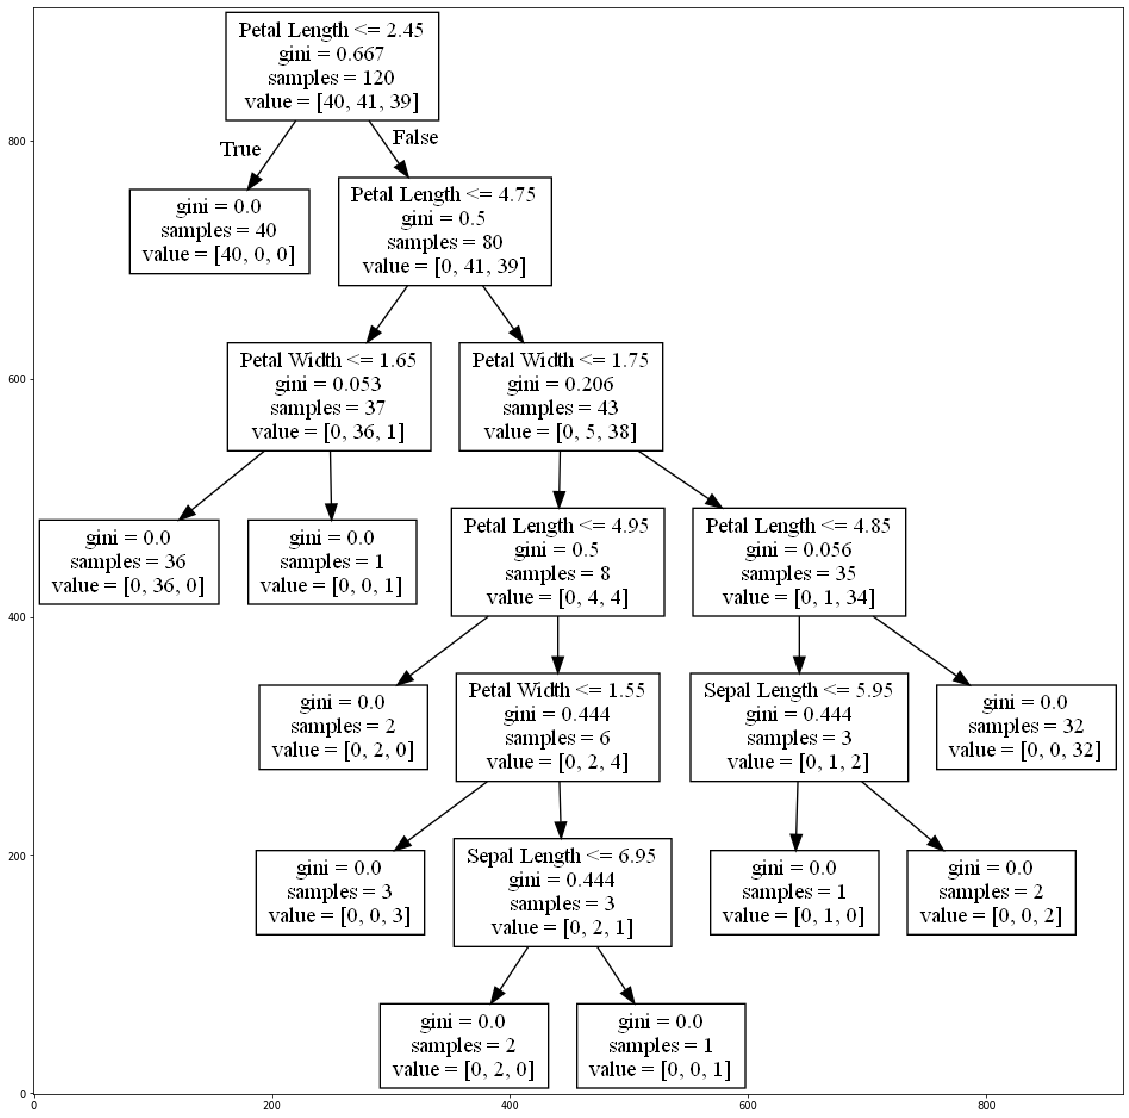

In [179]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img = cv2.imread('tree.png')
#img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
img = cv2.flip(img, 0)
plt.figure(figsize = (20, 20))
plt.imshow(img)

A better version:

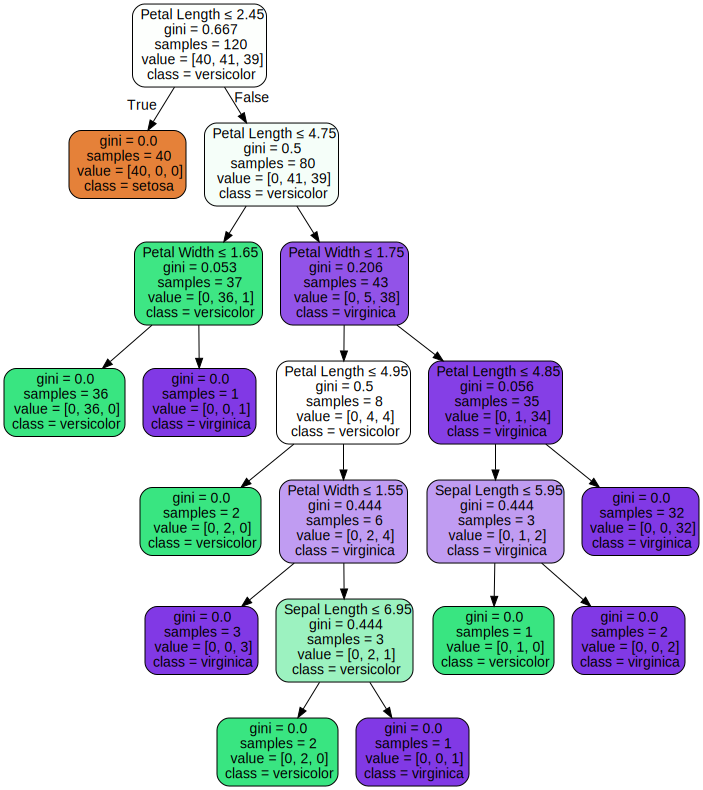

In [180]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=FEATURE_NAMES,  
                      class_names=['setosa', 'versicolor', 'virginica'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### 7.4 Mushroom dataset
Back to our mushroom stew, with **Gini gains** (yes, you may actually use Information gain *or* Gini gain for either categorical or continuous datasets)!

Can we still use the same algorithm even if our columns values are categorical?

Sure, all we have to is to convert the categories to integers. We don't even have to use sklearn's dummy variables API that creates as many new columns as there are categories: We can directly map categories to integer indexes! The column remains *categorical*, but the categories are now numbers instead of letters.

>**Note**: This is not always the case with ML algorithms. Very often, *more* binary columns is better than *one* column of integers.

In [187]:
X2 = pd.DataFrame([t[1:] for t in clean_instances], columns = attribute_names[1:])
X2

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,b,y,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,w,y,p
5640,x,y,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,w,y,p
5641,x,y,g,t,n,f,c,b,w,e,...,s,w,w,p,w,t,p,w,y,p
5642,x,y,c,f,m,f,c,b,y,e,...,y,c,c,p,w,n,n,w,c,d


In [188]:
y2 = [t[0] for t in clean_instances]
print(len(y2), y2[0:5])

5644 ['p', 'e', 'e', 'p', 'e']


In [189]:
transform_categorical(X2)
X2

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,2,0,...,2,5,5,0,0,1,3,1,3,5
1,5,2,7,1,0,1,0,0,2,0,...,2,5,5,0,0,1,3,2,2,1
2,0,2,6,1,3,1,0,0,3,0,...,2,5,5,0,0,1,3,2,2,3
3,5,3,6,1,6,1,0,1,3,0,...,2,5,5,0,0,1,3,1,3,5
4,5,2,3,0,5,1,1,0,2,1,...,2,5,5,0,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0,3,4,0,5,1,0,0,7,0,...,3,3,3,0,0,2,3,5,5,4
5640,5,3,4,0,5,1,0,0,7,0,...,3,3,3,0,0,2,3,5,5,4
5641,5,3,3,1,5,1,0,0,7,0,...,2,5,5,0,0,2,3,5,5,4
5642,5,3,1,0,4,1,0,0,8,0,...,3,1,1,0,0,0,2,5,1,0


In [190]:
y2 = [1 if d=='e' else 0 for d in y2]
print(len(y2), y2[0:5])

5644 [0, 1, 1, 0, 1]


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [192]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [193]:
y_pred = model2.predict(X_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  1.0
MAE : 0.0
RMSE: 0.0


In [194]:
export_graphviz(model2, 'tree.dot', feature_names = attribute_names[1:])

In [195]:
!dot -Tpng tree.dot -o tree.png

If you have the `cv2` library installed:

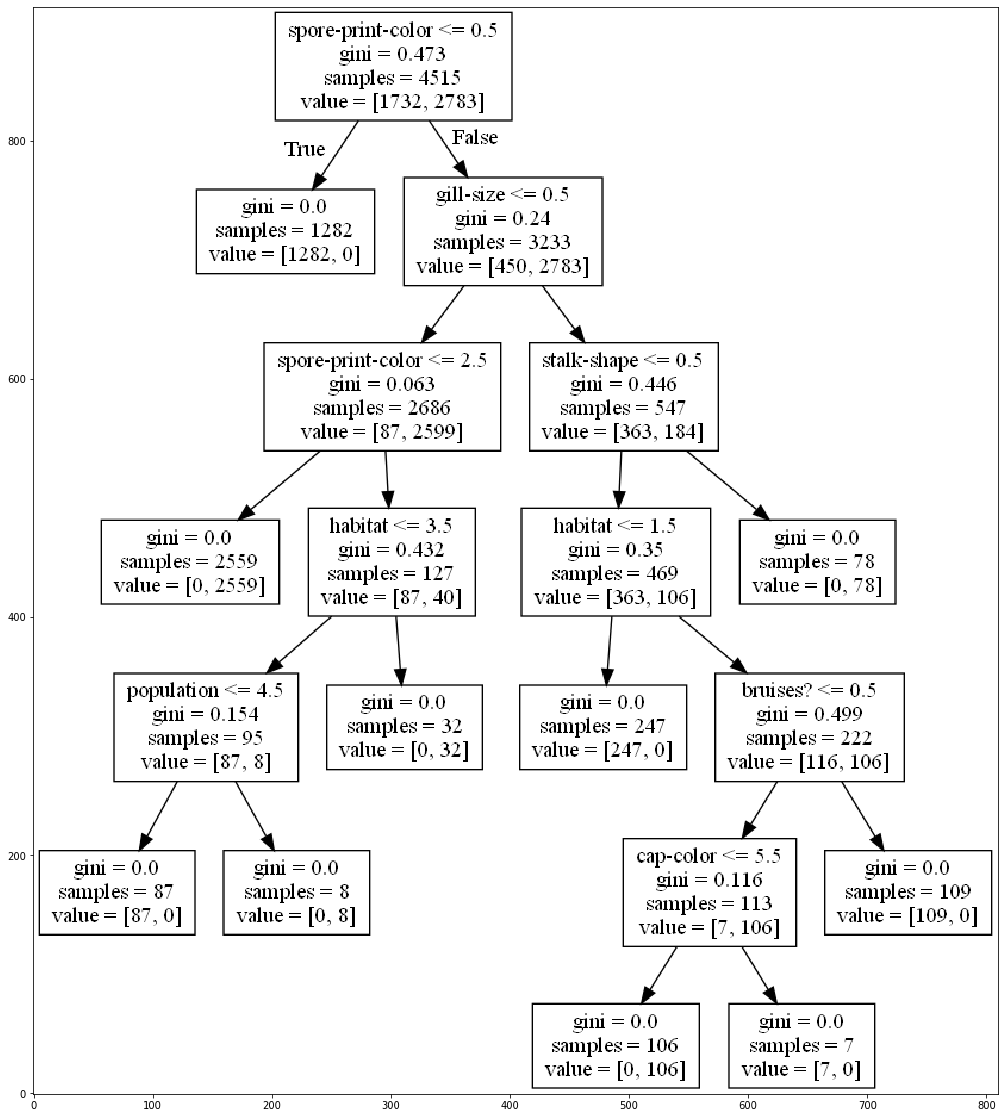

In [196]:
img = cv2.imread('tree.png')
#img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
img = cv2.flip(img, 0)
plt.figure(figsize = (20, 20))
plt.imshow(img)

Here's a nicer version of the same graph with the target class names:

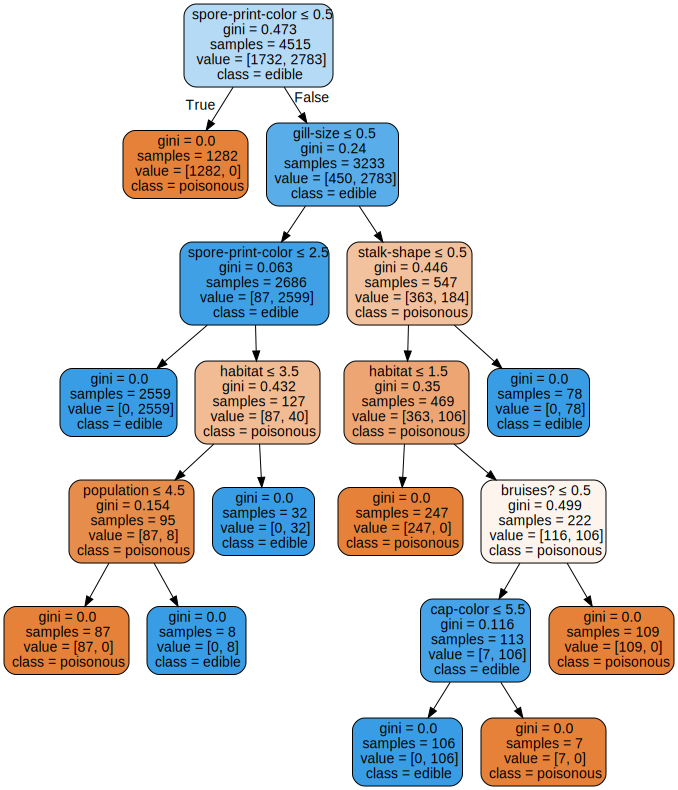

In [197]:
dot_data = tree.export_graphviz(model2, out_file=None, 
                      feature_names=attribute_names[1:],  
                      class_names=['poisonous', 'edible'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### 7.5 Receiver Operating Chracteristic (ROC) and Area Under the Curve (AUC)

We can use AUC (Area Under Curve) as the evaluation metric. Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems (see INFO 6105 for a definition of the [Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and for AUC).

A **receiver operating characteristic** curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a *binary* classifier system as its discrimination threshold is varied from confusing all class-1 instances as class-0 instances to all correctly distinguished, and from confusing all class-0 instances as class-1 instances to no such confusion at all.

The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR), at various threshold settings.

Typically, if you tune your model for maximum TPR (a good thing), you will start getting higher FPR (a bad thing), and if you train for minimum FPR (a good thing) you will start getting lower TPR (a bad thing):

<br />
<center>
<img src = images/roc-curve.png width = 450 />
</center>

The true-positive rate is also known as **sensitivity**. The false-positive rate is also known as probability of **false alarm**.

Imagine a study evaluating a test that screens people for a disease. Then:
- True positive: Sick people correctly identified as sick
- False positive: Healthy people incorrectly identified as sick
- True negative: Healthy people correctly identified as healthy
- False negative: Sick people incorrectly identified as healthy

Obviously, the ideal situation is TPR = 100% and FPR = 0%, which implies that a perfect classifier is the single point (0,1) in the above graph, which is what we get with our mushroom dataset and we say (a little bit incorrectly) that in that case AUC = 1.

In [198]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

## 8. Parameter turning

What are the parameters in a decision tree algorithm?

#### max_depth
The first parameter to tune in sklearn's decision tree algorithm is `max_depth`. This indicates how deep the tree can be. 

The deeper the tree, the more splits it has and it captures more information about the data. 

However, the deeper the tree, the more it overfits, too.

Let's fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

In [79]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_results.append(roc_auc)

Text(0.5, 0, 'Tree depth')

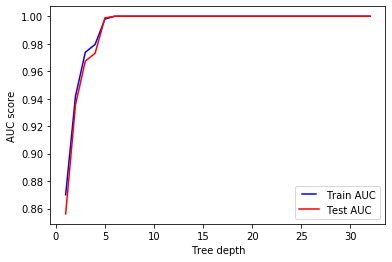

In [80]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')

The right depth value for our model appears to be 5 because 5 levels are enough to achieve perfect classification.

#### min_samples_split
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. 

#### min_samples_leaf
min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describes the minimum number of samples at the leafs.

#### max_features
max_features represents the number of features to consider when looking for the best split.

We will look at these hyperparameters more cloesly with another, more complicated, dateset further below.

>*Likely end of a one-hour class here.*

## 9. Feature importance and decision tree pitfalls
So far we've seen how to built seemingly successful decision trees.

However, our UCI mushroom dataset is very *predictable*. It is actually very common to see decision tree models built *incorrectly*.

<br />
<center>
<img src = ipynb.images/oopsie-donald.png width = 300 />
</center>

In fact, one can pull *completely wrong* insights from a decision tree!

### 9.1 Simulate some data with Poisson and Binomial
Let's see how this can happen. Let's simulate a dataset as a mixture model of a [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution) and [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution). So we have two independent variables that are **categorical** : `important_feature_poisson` and `important_feature_dummy`, and one dependent variable `Y` that is **continuous** rather than **categorical**.

Let's also create an *irrelevant* **continuous** feature (one that is not factored into the computation of the dependent variable) based on a **normal** distribution (`random_feature_normal`), and an *irrelevant* **categorical** feature based on the same binomial (`random_feature_dummy`). 

Irrelevant columns *do not* contribute to `Y` and should thus be completely uncorrelated with `Y`.

In [82]:
data = pd.DataFrame(
    {
        'important_feature_poisson': np.random.poisson(5, 1000),
        'important_feature_dummy': np.random.binomial(1, 0.5, 1000),
        'random_feature_normal': np.random.normal(0, 100, 1000),
        'random_feature_dummy': np.random.binomial(1 , 0.5, 1000)
    }
)

data['Y'] = (
    np.random.normal(5, 3, 1000) * data['important_feature_poisson'] + 
    np.random.normal(10, 3, 1000) * data['important_feature_dummy']
)

### 9.2 Visualize the features
We can clearly see with **pair plots** that `important_feature_poisson` and `important_feature_dummy` are *correlated* with `Y`, and that `random_feature_normal` and `random_feature_dummy` are *uncorrelated* with `Y`:

Text(0.5, 1.0, 'random_feature_dummy on Y')

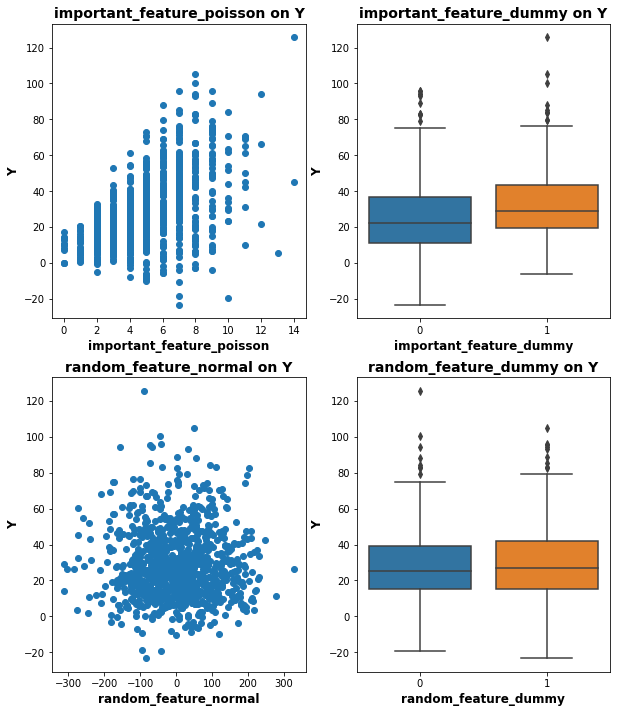

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 5]

f, ((g_poisson, g_important_dummy), (g_normal, g_random_dummy)) = plt.subplots(2,2)
plt.subplots_adjust(bottom=1, top=2.8)
                             
g_poisson.scatter(x = data['important_feature_poisson'], y = data['Y'], )
g_poisson.set_xlabel('important_feature_poisson', fontweight = 'bold', fontsize = 12)
g_poisson.set_ylabel('Y', fontweight = 'bold', fontsize = 12)
g_poisson.set_title('important_feature_poisson on Y', fontweight = 'bold', fontsize = 14)

sns.boxplot(x = data['important_feature_dummy'], y = data['Y'], ax=g_important_dummy)
g_important_dummy.set_xlabel('important_feature_dummy', fontweight = 'bold', fontsize = 12)
g_important_dummy.set_ylabel('Y', fontweight = 'bold', fontsize = 12)
g_important_dummy.set_title('important_feature_dummy on Y', fontweight = 'bold', fontsize = 14)

g_normal.scatter(x = data['random_feature_normal'], y = data['Y'], )
g_normal.set_xlabel('random_feature_normal', fontweight = 'bold', fontsize = 12)
g_normal.set_ylabel('Y', fontweight = 'bold', fontsize = 12)
g_normal.set_title('random_feature_normal on Y', fontweight = 'bold', fontsize = 14)

sns.boxplot(x = data['random_feature_dummy'], y = data['Y'], ax=g_random_dummy)
g_random_dummy.set_xlabel('random_feature_dummy', fontweight = 'bold', fontsize = 12)
g_random_dummy.set_ylabel('Y', fontweight = 'bold', fontsize = 12)
g_random_dummy.set_title('random_feature_dummy on Y', fontweight = 'bold', fontsize = 14)

### 9.3 Train a Decision Tree regressor

Let's create our `X`, `Y` datasets:

In [84]:
X = data.drop(['Y'], axis=1)
y = data['Y']

Since we have a **continuous** target variable instead of a categorical target variable, we train a decision tree *regressor* rather than a *classiffier*:

In [85]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X, y)

DecisionTreeRegressor()

### 9.4 Pull the importance
Let's see which features contributed the most to the decision tree model:

Text(0.5, 0, 'Relative Importance')

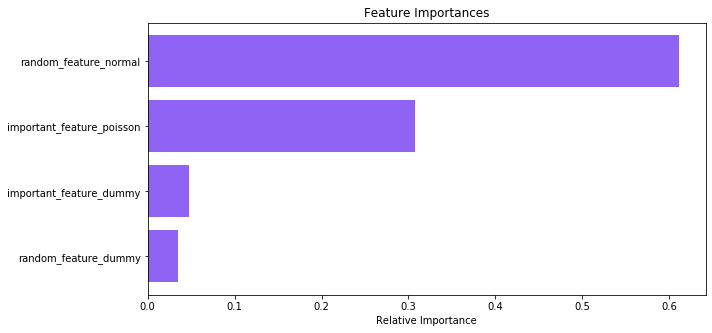

In [86]:
features = X.columns.values
importances = reg.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

<br />
<center>
<img src = ipynb.images/garfield-oh-no.png width = 200 />
</center>

*Whaaaaaaaaaat*??! The random normal feature is ranked as the ***most important feature***, even though we know for a fact that this feature has ***no impact*** on `Y` whatsoever!

The Poisson important feature is ranked 2nd, the important dummy variable is ranked 3rd and the random dummy variable 4th.

### 9.5 Learning *by heart*

Why this unexpected result? The model is actually ***learning by heart***!

<br />
<center>
<img src = ipynb.images/mult-table.jpg width = 400 />
</center>

>**Lesson learned**: The more *power* you give to an ML algorithm, the more likely the algorithm will learn the data *by heart* (i.e. overfitting) rather than learning the salient features that distinguish one label from another. How do you avoid overfitting? Reduce the power of your model. Nuclear reactors work the same way: What operators are busy doing is injecting impurities in the reactor to prevent it from overheating and melting down. So, in
your model, control its salient hyperparameters by (usually) lowering them.

If you take a look at the default parameters of our `DecisionTreeRegressor`, you’ll see:
```
max_depth=None
max_leaf_nodes=None
min_samples_leaf=1
min_samples_split=2
```

In [94]:
reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

The default parameters do not prevent **overfitting**: This allows the model to go all the way to an **mse** (mean squared error) of 0. 

>***Meltdown***!

Basically, the model is *memorizing* the data because it’s not limited in depth and can go all the way to *one observation per leaf*.

How is it doing that?

Since `random_feature_normal` is a random normal distribution, it has a different value for each observation. In that way, it can be used to *tailor* (i.e. *cheat*) the value of the prediction *for each observation*!

The Poisson random variable has a limited set of possible values and the two dummy variables have only two possibilities, so they are less helpful in tailoring the prediction. 

- Number of unique values for random_feature_normal = 1000
- Number of unique values for important_feature_poisson = 15
- Number of unique values for random_feature_dummy = 2
- Number of unique values for importaa nt_feature_dummy = 2

In order to reach an mse of 0, our model used `random_feature_normal` pretty intensely!

### 9.6 k-fold cross-validation to the rescue
If you ask a data scientist what **feature importance** is, the answer would be: "*It’s the decrease in accuracy when you remove that feature from the model*".

In practice, you don’t remove it from the model but what you can do is to **cross-validate** features and measure the decrease in accuracy on an out-of-bag sample (a test instance).

[k-fold cross validation]() is a resampling procedure used to estimate the skill of the model on new data. The overall aim of Cross-Validation is to evaluate machine learning models by training a number of models on different subsets of the input data. 

Cross-validation is used to detect overfitting in a model, where the model is not effectively generalizing patterns and similarities but rather learning the data *by heart* (overfitting). When using K-fold cross validation, all parts of the data will be able to be used as part of the testing data. This way, all of our data from our dataset can be used for both training and testing, allowing us to better evaluate the performance of our models. 

Having 10 or 100 different accuracy results for 10 or 100 different models trained on different data is always going to be better and more reliable than using one accuracy result and one model. For example, it will give a much better estimate of features' importance.

<br />
<center>
<img src = ipynb.images/under-good-over.webp width = 700 />
</center>

The procedure has a single parameter called `k` that refers to the number of groups that a given data sample is to be split into. 

We will pick a value of k = 100, to become 100-fold cross-validation.

k-fold cross-validation generally results in a less biased or less optimistic estimate of the model skill than a simple train/test split.

The general procedure is as follows:

- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
- - Take the group as a hold out or test data set
- - Take the remaining groups as a training data set
- - Fit a model on the training set and evaluate it on the test set
- - Retain the evaluation score and discard the model
- Summarize the skill of the model using the model sample evaluation scores

Each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set once, and used to train the model k-1 times.

Let’s do this manually.

We use sklearn's random permutation cross-validator, which yields indices to split data into training and test sets. Note that in contrast to other cross-validation strategies, random splits do not guarantee that all folds will be different, although this is unlikely for sizeable datasets.

In [87]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(len(X), 100, .3)
rs

d:\Anaconda3.5.1\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass test_size=100, train_size=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


ShuffleSplit(n_splits=1000, random_state=None, test_size=100, train_size=0.3)

In [88]:
scores = dict()
scores['important_feature_poisson'] = []
scores['important_feature_dummy'] = []
scores['random_feature_normal'] = []
scores['random_feature_dummy'] = []

To measure the impact of each feature on accuracy of the model, one possible solution is to permute the values of each feature during validation (without changing the label) and measure how much the permutation decreases the accuracy of the model. 

Clearly, for unimportant features, the permutation should have little to no effect on model accuracy, while permuting the values for important features should significantly decrease it.

Text(0.5, 0, 'Mean decrease accuracy')

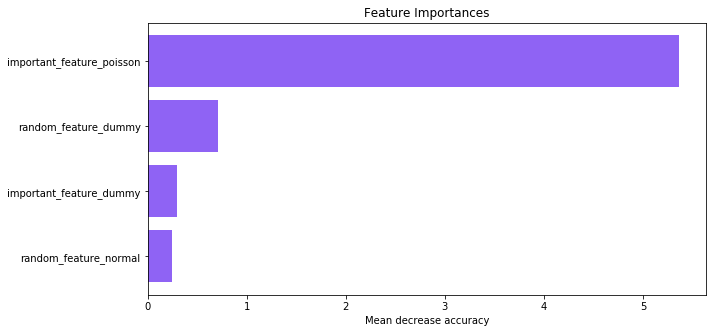

In [109]:
# from http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
for j, (train_idx, test_idx) in enumerate(rs.split(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = reg.fit(X_train, Y_train)
    acc = r2_score(Y_test, reg.predict(X_test))
    
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, reg.predict(X_t))
        scores[features[i]].append((acc-shuff_acc)/acc)

mda_features = [f for f in scores.keys()]
mda_importance = [(np.mean(score)) for score in scores.values()]
mda_indices = np.argsort(mda_importance)

plt.title('Feature Importances')
plt.barh(range(len(mda_indices)), [mda_importance[i] for i in mda_indices], color='#8f63f4', align='center')
plt.yticks(range(len(mda_indices)), [mda_features[i] for i in mda_indices])
plt.xlabel('Mean decrease accuracy')

The results are now completely different from the first feature importance graph and in line with the data we have created.

There is a *second* way of computing feature importance called **Gini importance**. In the case of a tree regressor, the importance is assessed by how much a feature decreases the weighted variance in a tree (in the case of classification it’s
not variance but Gini impurity). 

The weight is computed through the fraction of the sample reaching a given node (where the feature is used). This is the method used by sklearn. 

>This is the explanation given in scikit-learn’s documentation: "*The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the
target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features*."

The important features will indeed be used at the top of each tree because they are the ones reducing the variance the most in the beginning, but `random_feature_normal` will be extensively used at the bottom of the tree. Each node will contribute to a small fraction of the sample and of the variance reduction, but there will be so many nodes using the feature that, overall, the feature will impact almost all samples with a significant reduction in variance.

In [106]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

We can create an instance that splits `X` into 3 folds, shuffles prior to the split, and uses a value of 1 for the pseudorandom number generator.

In [107]:
from sklearn.model_selection import KFold
kfold = KFold(3, True, 1)

d:\Anaconda3.5.1\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Let's enumerate the splits:

In [108]:
for train, test in kfold.split(X):
    print('train: %s, test: %s' % (train, test))

train: [  1   2   7   8  10  12  13  14  15  20  21  22  23  24  25  26  27  28
  30  32  33  35  36  37  39  43  44  45  46  48  50  51  52  53  54  55
  56  57  60  61  63  64  70  71  72  73  74  75  76  77  79  80  81  82
  83  84  86  87  88  89  91  93  94  95  96  97  98  99 100 103 105 106
 108 109 112 113 114 115 116 118 122 123 125 126 127 129 130 131 134 136
 137 138 139 140 141 143 144 145 148 149 150 151 152 153 154 155 156 158
 163 164 166 167 169 170 171 174 175 176 177 178 181 182 183 184 185 188
 190 191 193 194 196 198 199 200 202 203 204 205 206 208 209 210 211 212
 213 215 216 217 218 219 220 222 224 226 227 228 229 230 231 234 235 238
 239 240 241 243 248 250 251 252 253 254 255 256 259 260 261 262 263 264
 265 266 267 269 270 271 272 275 276 278 279 280 281 282 287 288 290 294
 296 297 298 299 300 301 302 303 309 310 311 312 313 314 316 317 319 320
 321 322 323 325 327 328 330 331 332 333 336 337 338 339 340 341 343 345
 348 349 351 352 353 354 355 356 357 359 360

Now, let's create an instance that splits X into 10 folds, shuffles prior to the split, and uses a value of 41 for the pseudorandom number generator: `KFold(10, True, 41)`. Indices are used directly on the original data array to retrieve the observation values:

In [112]:
kfold = KFold(10, True, 41)

# enumerate splits
for train, test in kfold.split(X):
    # print('train: %s, test: %s' % (X[train], X[test]))
    print('train: %s' % X[train], X[test])
    print('test: %s' % X[test])
    print('')

train: [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [[1.585e+01 2.395e+01 1.037e+02 ... 1.119e-01 2.809e-01 6.287e-02]
 [1.354e+01 1.436e+01 8.746e+01 ... 1.288e-01 2.977e-01 7.259e-02]
 [8.598e+00 2.098e+01 5.466e+01 ... 2.778e-02 2.972e-01 7.712e-02]
 ...
 [1.026e+01 1.658e+01 6.585e+01 ... 8.333e-02 2.691e-01 9.479e-02]
 [1.288e+01 2.892e+01 8.250e+01 ... 6.493e-02 2.372e-01 7.242e-02]
 [1.522e+01 3.062e+01 1.034e+02 ... 2.356e-01 4.089e-01 1.409e-01]]
test: [[1.585e+01 2.395e+01 1.037e+02 ... 1.119e-01 2.809e-01 6.287e-02]
 [1.354e+01 1.436e+01 8.746e+01 ... 1.288e-01 2.977e-01 7.259e-02]
 [8.598e+00 2.098e+01 5.466e+01 ... 2

Running the example prints the specific observations chosen for each train and test set. The indices are used directly on the original data array to retrieve the observation values.

Usefully, the k-fold cross validation implementation in scikit-learn is provided as a component operation within broader methods, such as grid-searching model hyperparameters and scoring a model on a dataset.

Nevertheless, the `KFold` class can be used directly in order to split up a dataset prior to modeling such that all models will use the same data splits. This is especially helpful if you are working with very large data samples. The use of the same splits across algorithms can have benefits for statistical tests that you may wish to perform on the data later.

Now, what to do with all the models discarded? You could, for example, bag them (bootstrap-aggregate them) into one model:

In [115]:
kfold = KFold(10, True, 41)
cart = DecisionTreeClassifier()
num_trees = 100

from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

model = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 41)
results = model_selection.cross_val_score(model, X_test, y_test, cv = kfold)
print("mean accuracy:", results.mean())

mean accuracy: 0.9447619047619048


Individual models (weak learners) overfit the data and have a high variance. But the aggregated result has a reduced variance and is trustworthy: That is what a **random forest** (RF) is!

### Variations on Cross-Validation
There are a number of variations on the k-fold cross validation procedure.

Five commonly used variations are as follows:

- Train/Test Split: Taken to one extreme, k may be set to 2 (not 1) such that a single train/test split is created to evaluate the model.
- LOOCV: Taken to another extreme, k may be set to the total number of observations in the dataset such that each observation is given a chance to be the held out of the dataset. This is called leave-one-out cross-validation, or LOOCV for short.
- Stratified: The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.
- Repeated: This is where the k-fold cross-validation procedure is repeated n times, where importantly, the data sample is shuffled prior to each repetition, which results in a different split of the sample.
- Nested: This is where k-fold cross-validation is performed within each fold of cross-validation, often to perform hyperparameter tuning during model evaluation. This is called nested cross-validation or double cross-validation.

### A note about sliding and growing windows

**Sliding windows** are essentially like k-fold cross-validation: An opportunity to train many models with different samples of training data and validate with different samples of test data. 

Here is where you can prove that predicting a feature with a certain horizon of n days in advance is possible (or not). The choice of the sliding window is critical: How much data makes sense to do the prediction? 

Here is also a case where a **growing window** might actually be better because it will tell you how many days of observation is the best window size. A too small window size will suffer from the fact that statistically we don't have enough data. A too big window size will suffer from the fact that we are missing the real  snow-causing pehonomenon.

Once you're found the right size for your window, you could then do a 100-fold cross-validation, leading to 100 different models. Then, you could bag them (bootstrap-aggregate them) to create a random forest that may be the best possible model (even tho you lose explainability with the forest).

Sliding windows will be critical for your final project, where we select meteorological features over a number of hours to predict what happens in the future hours!

### 9.7 Pruning a decision tree
A `DecisionTreeClassifier` provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting.

Setting these is a simple method to avoid overfit.

**Cost complexity pruning** provides another option to control the size of a tree. In `DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned.

To get an idea of what values of `ccp_alpha` could be appropriate, sklearn provides `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Let's look at an example.

In [92]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

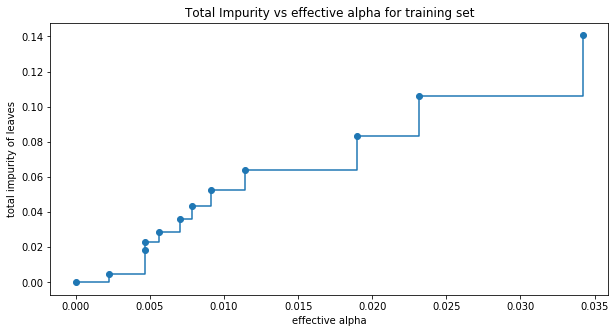

In [93]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Let's train a decision tree using the effective alphas.

In [94]:
len(ccp_alphas)

13

In [95]:
clfs = []
for i,ccp_alpha in enumerate(ccp_alphas):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    print(i,
    "Number of nodes in the tree is: {} with ccp_alpha: {}".format(
        clfs[i].tree_.node_count, ccp_alphas[i]
        )
         )

0 Number of nodes in the tree is: 31 with ccp_alpha: 0.0
1 Number of nodes in the tree is: 27 with ccp_alpha: 0.0022664723976040134
2 Number of nodes in the tree is: 21 with ccp_alpha: 0.004647426339100881
3 Number of nodes in the tree is: 19 with ccp_alpha: 0.004659799593581376
4 Number of nodes in the tree is: 17 with ccp_alpha: 0.005633802816901408
5 Number of nodes in the tree is: 15 with ccp_alpha: 0.007042253521126761
6 Number of nodes in the tree is: 13 with ccp_alpha: 0.007841938420144537
7 Number of nodes in the tree is: 11 with ccp_alpha: 0.009114019793328328
8 Number of nodes in the tree is: 9 with ccp_alpha: 0.011443661971830986
9 Number of nodes in the tree is: 7 with ccp_alpha: 0.018988002086593604
10 Number of nodes in the tree is: 5 with ccp_alpha: 0.023141627543035996
11 Number of nodes in the tree is: 3 with ccp_alpha: 0.03422474765119576
12 Number of nodes in the tree is: 1 with ccp_alpha: 0.3272984419327777


The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

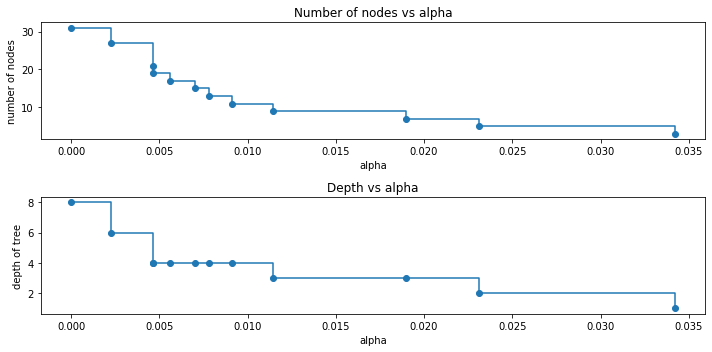

In [96]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. 

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better! 

In our example, setting ccp_alpha=0.015 maximizes the testing accuracy.

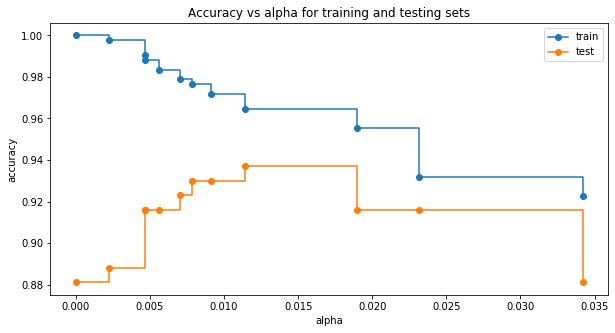

In [97]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()

Mazimizing testing accuracy for a good selection of test sets is the holy grail of model building, so using cost complexity pruning alpha measures is a good model building tool for decision trees.

### 9.8 Hypeparameter tuning
Now that we have a more complex, tougher-to-model dataset than our mushroom dataset, let's look at our other hyperparameters and try to tune them.

#### max_depth
The first parameter to tune is `max_depth`. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

In [36]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_results.append(roc_auc)

NameError: name 'DecisionTreeClassifier' is not defined

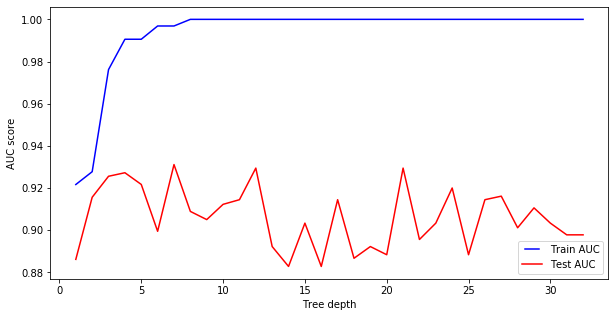

In [99]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We see that our model *overfits* for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data. 

A tree depth of 4 looks optimal to me!

#### min_samples_split
`min_samples_split` represents the minimum number of samples required to split an internal node. 

This can vary between considering at least one sample at each node to considering all of the samples at each node. 

When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples.

In [100]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

Text(0.5, 0, 'min samples split')

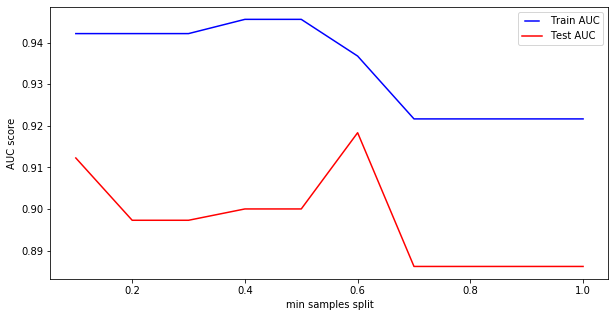

In [101]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')

We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. This is an **underfitting** case.

#### min_samples_leaf
`min_samples_leaf` is The minimum number of samples required to be at a leaf node. 

This parameter is similar to `min_samples_splits`, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

`min_samples_leaf` must be at least 1 or in (0, 0.5].

In [102]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

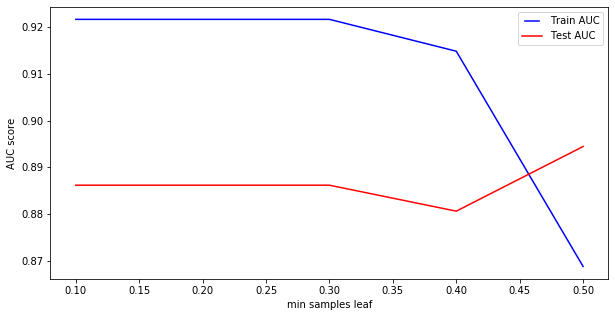

In [103]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Same conclusion as to previous parameter. Increasing this value may cause underfitting.

#### max_features
`max_features` represents the number of features to consider when looking for the best split.

In [104]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

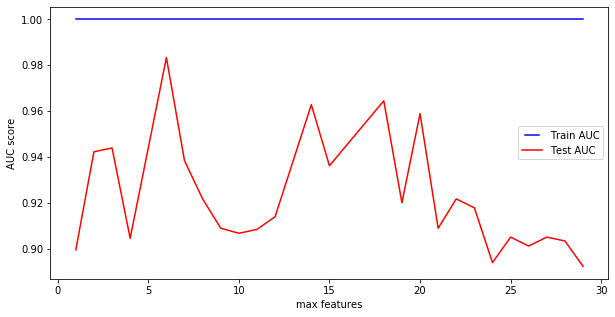

In [105]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

This is also an **overfitting** case. 

It’s unexpected to get overfitting for all values of `max_features`. However, according to sklearn documentation for decision tree, the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than `max_features` features

## 10. Conclusion

[Scikit-Learn](http://scikit-learn.org/) has more full-featured decision tree building functions, and other types of machine learning algorithms. We'll use scikit-learn's decision forest building algoirthm in our lab.

### The ID3 and C4.5 Algorithms
[Ross Quinlan](https://en.wikipedia.org/wiki/Ross_Quinlan) invented the ID3 algorithm that uses entropy and information gain to recursively create decision trees. This algorithm had some weaknesses, such as the inability to handle numerical attributes or attributes with missing values. His extension to ID3, C4.5, addressed those weaknesses.

### Regressor versus Classifier
It is commonly thought that decision trees (and random forests) are *discrete* algorithms. In other words, *classifiers* rather than *regressors*. But that's not true, decision trees can work with continuous data just as easily!

Here are *three* regressors with *three* different tree depths learning models for a sine curve:

In [116]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

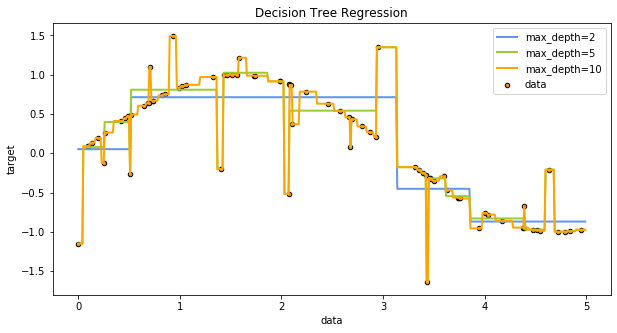

In [117]:
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="orange", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

And here they are one by one, from shallow to deep:

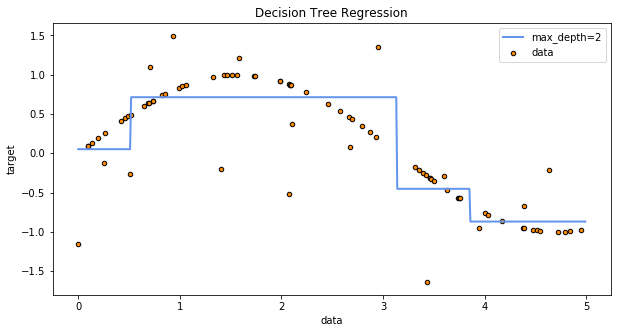

In [118]:
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

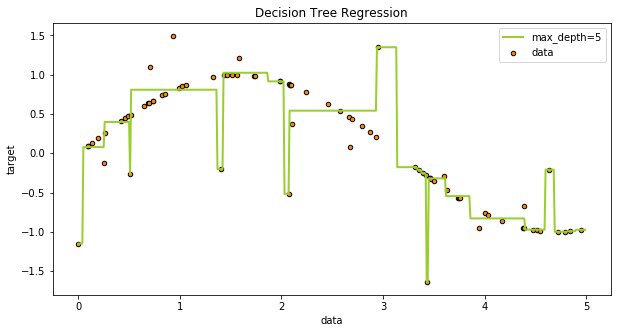

In [119]:
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

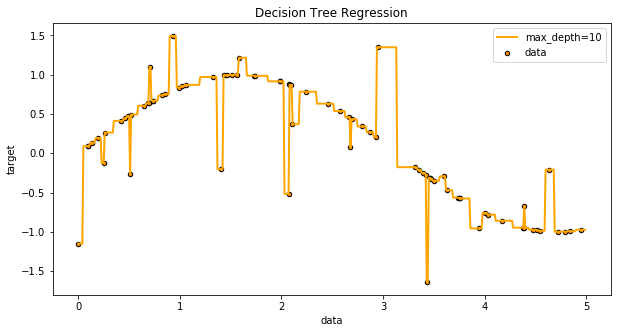

In [120]:
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_3, color="orange", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

### Overfit
The idea of overfitting means that your prediction model is too *biased* towards your training data. 

Think about the hypothetical case where a node in our mushroom decision tree has 1,000 examples that are poisonous and only 1 that is edible. 

Should we really split the tree again here, or would it be a better idea to just assume that all mushrooms at this node are poisonous? 

Perhaps that single edible mushroom was simply mislabeled by our scientists. Or perhaps there is some attribute about mushrooms that the scientists did not take into account that might better split the examples earlier on.

It’s a good idea to assume that there is *noise* in our observations. If we don’t, we may build a tree too affected by this noise, and thus have it overfit to our training examples. New examples, then, could have lower classification accuracy.

To alleviate overfit, it is custom to [prune](https://en.wikipedia.org/wiki/Pruning_(decision_trees)) decision treesm as we did above, or to remove sections of the tree that provide little power to classify instances.

<br />
<center>
<img src = ipynb.images/pruned.jpeg width = 600 />
</center>

You should also be on the lookout for columns that can take on a large number of distinct values. For example, suppose that one is building a decision tree for some data describing the customers of a business. Information gain is often used to decide which of the attributes are the most relevant, so they can be tested near the root of the tree. One of the columns might be the customer's membership number. This attribute has a high mutual information, because it uniquely identifies each customer, but we do not want to include it in any decision tree. Deciding how to treat a customer based on their membership number is unlikely to generalize to customers we haven't seen before, and so leads to overfitting. This issue can also occur if the observations being tested have multiple columns with many distinct values. In this case, it can cause the information gain of each of these attributes to be much higher than those without as many distinct values.

This concept is very reminiscent of **scaling**. We already know from INFO 6105 that we need to ensure, when learning a dataset with any kind of learning algorithm, that value columns *have the same range*, otherwise the column with the bigger range will always dwarf calculations from columns with smaller ranges. Similarly, categorical columns with many categories will dwarf categorical columns with a small number of categories.

### Feature selection
Feature selection based on impurity reduction is biased towards preferring variables with more categories. When the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. 

But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. 

As a consequence, they will have a lower reported importance. This is not an issue when we want to use feature selection to reduce overfitting, since it makes sense to remove features that are mostly duplicated by other features. But when interpreting the data, it can lead to the *incorrect conclusion that one of the variables is a strong predictor while the others in the same group are unimportant*, while actually they are very close in terms of their relationship with the response variable.

### Lesson learned
You can now see that the common mistake made when using a decision tree (or random forest) comes from a combination of two factors:
1. Using default parameters
2. Using the `feature_importances_` method from sklearn

In general:
- Default parameters are not necessarily safe
- Don’t assume that the pre-coded functions such as `feature_importance_` work the way you are used to. Always look at documentation.
- Always assess the performance of the model on a test set even if your objective is not prediction
- Use k-fold corss validation rather than train_test_split
- Modify default parameters or prune your tree to reduce overfit and create a more generalizable tree that works better for new data

How could you apply decision trees to data science problems in general? For one, you could just extensively compile *hundreds* of ML statistics, put them all in a spreadsheet, and let *your laptop tell you which statistics are the most important* by having it build *good* decision trees (most important factors are closer to the root of the tree). Then you can model these parameters directly.

# Homework
Apply a decision tree algorithm to our research dataset.

Compute the entropy of the dataset. Create a decision tree model and score the model.

Build 2 models by working with two distinct labels:

- One (your pick) that is correlated with other features
- **precipitation** amount as the label (less correlated).

Make sure not to learn a model by heart (overfit) by employing techniques employed and documented in this notebook. With your final models, *explain* (interpret) the model: If you were to give another human instructions for how to predict, what `if-then-else` *instructions* would you give them?

The goal of this homework is two-fold:
- To get you to work on decision trees and become more familiar with its algorithms and techniques.
- To familliarize yourself with our research dataset that you will use for your final project.

>**Rubrik**: Your homework will not be graded based on how well you predict, we already know that when the dataset is predictable with *if-then-else* considerations (i.e. information entropy considerations), decision trees and random forests can do a pretty good job. By the same token, some datasets may *not* be predictable due to missing information. Instead, try to make your model *small* relative to the number of features and its hyperparameters. Think about it as how *explainable* your model is (what model do you think it better: (*turn right*, or "*turn left, then left again, and finally another left*?. Overfit and that's bad. Underfitting is better than overfitting.

For your homework, focus on *meteorological data* for *Traverse City*, for 2012 (`MI-14850-2011Fall-2012Spring.csv`).

# Research dataset
Instead of working on a toy dataset like UCI Mushrooms, we are going to work throughout the semester applying ML algorithms to see if we can predict [Lake Effect Precipitation](https://en.wikipedia.org/wiki/Lake-effect_snow) in Chicago. I've been working on this dataset with a Master's thesis student, and you can find the data and the processing notebooks [here](https://derpyhusky.dog/).

This what, you can also learn how to **scientific research** based on data science and Machine Learning.

We have satellite and weather station data one these regions of the midwest:

<br />
<center>
<img src = ipynb.images/midwest.png width = 400 />
</center>

If we combine **satellite data** over Lake Michigan with **weather station data** close to the lakeshore of Lake Michigan, can we reliably predict Lake Effect precipitation 3 days (or less?) in advance? 

For Traverse City, MI, you can get the meteorological data and 1-D Lake Michigan satellite data as a single CSV file:
[meteo + satellite Traverse City](https://northeastern-my.sharepoint.com/:x:/g/personal/zhang_noc_northeastern_edu/EdD22Naww89Or-2SYfyuIFsBwWyNcYq0K_Fxba_d8b7_DA?e=YwSrh8)

If you would like to only access meteorological data, use this link: [meteo Traverse City](https://northeastern-my.sharepoint.com/:u:/g/personal/zhang_noc_northeastern_edu/ERq4oLWgLB9Btxz4r-eVxn0BhaqrhpUhm7UtTOLIkf4amg?e=TYFfQu)

The data and its processing is [here](https://derpyhusky.dog/)
```
Username: info6106student
Password: !nfo_$hsare
```

# References
- [Decision Tree Learning](http://gieseanw.wordpress.com/2012/03/03/decision-tree-learning/).
- [Decision Trees with sklearn](https://scikit-learn.org/stable/modules/tree.html).
- [Gradient tree boosting](https://en.wikipedia.org/wiki/Gradient_boosting#Gradient_tree_boosting): [XGBoost](https://xgboost.readthedocs.io/en/stable/) implementation
- [ExtraTrees](https://en.wikipedia.org/wiki/Random_forest#ExtraTrees): [sklearn.ensemble.ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) implementation

- [What is a Lake Effect Snow? - National Weather Service](https://www.weather.gov/safety/winter-lake-effect-snow)
- [SciJinks Lake Effect Snow](https://scijinks.gov/lake-snow/)